# [Personal Project]
---
> ## * Subject: SALARY PREDICTION of Players who sign a FA Contract
>![](http://news.sportslogos.net/wp-content/uploads/2014/09/MLB.png)
>---
> ## * Content:
>    * The goal of this project is to predict the 2018 FA Salaries of qualified players in 2018 based on many data that analized stats of players in the past. (Based on the FA results from 2006 to 2017)
>
>    * The 2018 FA Salaries are predicted by 2017 stats(2017.04 ~ 2017.10)
>
>    * **Analysis : Regression**
>---
> ## * Composition of data
>    * Rows : 1,225
>    * Columns : 72
>    * Dependent Variable : Salary(Y)
>    * Independent Variables : All variables except Dependent Variable
>---
> ## * Process of Progress
>    * EDA(Exploratory data analysis)
>    * Feature selection
>    * Modeling(OLS Regression)
>    * Cross Validation
>    * Model selection

**---**
** 'Import' all the necessary packages **

In [1]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import normalize, LabelEncoder
from patsy import dmatrix
from sklearn.linear_model import LinearRegression, LassoCV, LassoLarsCV, RidgeCV, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn import cross_validation
from sklearn.metrics import explained_variance_score, mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import xgboost as xgb
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [294]:
df = pd.read_csv('../dataset/mlb_fa_list2.csv')

print(df.shape)
df.tail()

(1225, 72)


,Name,Yr,Team,G,AB,PA,H_b,1B,2B,3B,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB%,K%,BB/K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC+,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR/9,BB/9,K/9,K/BB,K-BB%,GB%,HR/FB,LOB%,ERA,BABIP_p,FIP,WHIP,Contract Yrs,Total Salary($),Avg Salary($)
1220,Trevor Plouffe,2016,Twins,84,319.0,344.0,83.0,57.0,13.0,1.0,12.0,35.0,47.0,19.0,0.0,60.0,5.5,17.4,0.32,0.284,2.0,3.0,1.0,11.0,1.0,0.0,-8.4,0.160,0.311,-2.1,0.260,0.303,0.420,0.723,-0.4,91.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,1.0,5250000.0,5250000.0
1221,Tyson Ross,2016,Padres,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.1,0.0,-0.24,0.0,1.0,1.0,0.0,5.1,9.0,0.0,1.0,5.0,8.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,27.0,1.0,0.0,1.69,8.44,5.0,14.8,47.4,0.0,33.3,11.81,0.474,2.96,1.88,1.0,6000000.0,6000000.0
1222,Welington Castillo,2016,Diamondbacks,113,416.0,457.0,110.0,72.0,24.0,0.0,14.0,41.0,68.0,33.0,3.0,121.0,7.2,26.5,0.27,0.337,4.0,4.0,0.0,5.0,2.0,0.0,9.8,0.159,0.319,0.4,0.264,0.322,0.423,0.745,1.6,91.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,13000000.0,6500000.0
1223,Wilson Ramos,2016,Nationals,131,482.0,523.0,148.0,101.0,25.0,0.0,22.0,58.0,80.0,35.0,2.0,79.0,6.7,15.1,0.44,0.327,2.0,4.0,0.0,17.0,0.0,0.0,8.4,0.189,0.361,18.7,0.307,0.354,0.496,0.850,3.4,124.0,2.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,12500000.0,6250000.0
1224,Yoenis Cespedes,2016,Mets,132,479.0,543.0,134.0,77.0,25.0,1.0,31.0,72.0,86.0,51.0,8.0,108.0,9.4,19.9,0.47,0.298,7.0,6.0,0.0,14.0,3.0,1.0,-9.2,0.251,0.369,22.8,0.280,0.354,0.530,0.884,3.2,135.0,3.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,4.0,110000000.0,27500000.0


In [295]:
df.loc[1033, 'Team'] = 'Dodgers'
df.loc[10, 'Team'] = 'Rays'
df.loc[23, 'Team'] = 'Rays'
df.loc[50, 'Team'] = 'Rays'
df.loc[57, 'Team'] = 'Rays'
df.loc[102, 'Team'] = 'Rays'
df.loc[227, 'Team'] = 'Rays'
df.loc[267, 'Team'] = 'Rays'

In [296]:
len(df.Team.value_counts(sort=False))

30

In [297]:
df.rename(columns={"wRC+": "wRC_Plus", "Contract Yrs" : "Contract_Yrs"}, inplace=True)
df.rename(columns={"BB%": "BB_Percent", "K%": "K_Percent", "K-BB%": "K_BB_Percent", "GB%": "GB_Percent",
                   "LOB%": "LOB_Percent"}, inplace=True)
df.rename(columns={"Avg Salary($)": "Salary", "Total Salary($)" : "Total_Salary"}, inplace=True)
df.rename(columns={"1B" : "Hits", "2B" : "Doubles", "3B" : "Triples"}, inplace=True)
df.rename(columns={"BB/K" : "BB_per_K", "HR/9" : "HR_per_9", "BB/9" : "BB_per_9", "K/9" : "K_per_9", "K/BB" : "K_per_BB",
                   "HR/FB" : "HR_per_FB"}, inplace=True)

df.tail()

,Name,Yr,Team,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP,Contract_Yrs,Total_Salary,Salary
1220,Trevor Plouffe,2016,Twins,84,319.0,344.0,83.0,57.0,13.0,1.0,12.0,35.0,47.0,19.0,0.0,60.0,5.5,17.4,0.32,0.284,2.0,3.0,1.0,11.0,1.0,0.0,-8.4,0.160,0.311,-2.1,0.260,0.303,0.420,0.723,-0.4,91.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,1.0,5250000.0,5250000.0
1221,Tyson Ross,2016,Padres,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.1,0.0,-0.24,0.0,1.0,1.0,0.0,5.1,9.0,0.0,1.0,5.0,8.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,27.0,1.0,0.0,1.69,8.44,5.0,14.8,47.4,0.0,33.3,11.81,0.474,2.96,1.88,1.0,6000000.0,6000000.0
1222,Welington Castillo,2016,Diamondbacks,113,416.0,457.0,110.0,72.0,24.0,0.0,14.0,41.0,68.0,33.0,3.0,121.0,7.2,26.5,0.27,0.337,4.0,4.0,0.0,5.0,2.0,0.0,9.8,0.159,0.319,0.4,0.264,0.322,0.423,0.745,1.6,91.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,13000000.0,6500000.0
1223,Wilson Ramos,2016,Nationals,131,482.0,523.0,148.0,101.0,25.0,0.0,22.0,58.0,80.0,35.0,2.0,79.0,6.7,15.1,0.44,0.327,2.0,4.0,0.0,17.0,0.0,0.0,8.4,0.189,0.361,18.7,0.307,0.354,0.496,0.850,3.4,124.0,2.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,12500000.0,6250000.0
1224,Yoenis Cespedes,2016,Mets,132,479.0,543.0,134.0,77.0,25.0,1.0,31.0,72.0,86.0,51.0,8.0,108.0,9.4,19.9,0.47,0.298,7.0,6.0,0.0,14.0,3.0,1.0,-9.2,0.251,0.369,22.8,0.280,0.354,0.530,0.884,3.2,135.0,3.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,4.0,110000000.0,27500000.0


In [298]:
df0 = df.copy()

In [299]:
df.sample(3)

,Name,Yr,Team,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP,Contract_Yrs,Total_Salary,Salary
1062,Geovany Soto,2015,White Sox,78,187.0,210.0,41.0,24.0,8.0,0.0,9.0,20.0,21.0,21.0,0.0,63.0,10.0,30.0,0.33,0.278,1.0,0.0,1.0,2.0,0.0,1.0,4.9,0.187,0.311,-0.4,0.219,0.301,0.406,0.708,1.2,96.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.00,1.0,2800000.0,2800000.0
726,Jeremy Affeldt,2012,Giants,67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.9,0.0,0.36,1.0,2.0,0.0,0.0,63.1,57.0,1.0,23.0,57.0,23.0,3.0,1.0,0.0,19.0,3.0,16.0,1.0,0.0,267.0,5.0,0.14,3.27,8.1,2.48,12.7,59.9,2.9,73.5,2.7,0.306,2.73,1.26,3.0,18000000.0,6000000.0
223,Eric Hinske,2007,Red Sox,84,186.0,218.0,38.0,17.0,12.0,3.0,6.0,25.0,21.0,28.0,2.0,54.0,12.8,24.8,0.52,0.252,3.0,1.0,0.0,7.0,3.0,0.0,-5.2,0.194,0.313,-3.2,0.204,0.317,0.398,0.714,-0.2,84.0,-1.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.00,1.0,1500000.0,1500000.0


In [300]:
df.Team.value_counts(sort=False)

Cardinals       42
Phillies        43
Blue Jays       50
Royals          38
Diamondbacks    35
Braves          47
Nationals       39
Reds            37
Astros          32
White Sox       36
Padres          37
Indians         26
Giants          45
Rays            40
Rockies         35
Brewers         33
Cubs            45
Marlins         27
Red Sox         50
Tigers          36
Mets            51
Yankees         58
Athletics       34
Dodgers         77
Orioles         38
Mariners        34
Pirates         41
Twins           31
Angels          36
Rangers         52
Name: Team, dtype: int64

In [301]:
cclist = 'Yr + C(Team) + G + AB + PA + H_b + Hits + Doubles + Triples + HR_b + R_b + RBI + BB_b + IBB_b + SO_b + BB_Percent + K_Percent + BB_per_K + BABIP_b + HBP_b + SF + SH + GDP + SB + CS + Def + ISO + wOBA + wRAA + AVG + OBP + SLG + OPS + WAR + wRC_Plus + WPA + W + L + GS + CG + IP + H_p + HR_p + BB_p + SO_p + R_p + SV + BS + BK + ER + HBP_p + HLD + IBB_p + ShO + TBF + WP + HR_per_9 + BB_per_9 + K_per_9 + K_per_BB + K_BB_Percent + GB_Percent + HR_per_FB + LOB_Percent + ERA + BABIP_p + FIP + WHIP + 0'

In [302]:
dftemp = dmatrix(cclist, data=df)

In [303]:
dftemp_columns = dftemp.design_info.column_names
dftemp = pd.DataFrame(dftemp, columns=dftemp_columns)

In [304]:
dftemp.sample(3)

,C(Team)[Angels],C(Team)[Astros],C(Team)[Athletics],C(Team)[Blue Jays],C(Team)[Braves],C(Team)[Brewers],C(Team)[Cardinals],C(Team)[Cubs],C(Team)[Diamondbacks],C(Team)[Dodgers],C(Team)[Giants],C(Team)[Indians],C(Team)[Mariners],C(Team)[Marlins],C(Team)[Mets],C(Team)[Nationals],C(Team)[Orioles],C(Team)[Padres],C(Team)[Phillies],C(Team)[Pirates],C(Team)[Rangers],C(Team)[Rays],C(Team)[Red Sox],C(Team)[Reds],C(Team)[Rockies],C(Team)[Royals],C(Team)[Tigers],C(Team)[Twins],C(Team)[White Sox],C(Team)[Yankees],Yr,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP
922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,146.0,553.0,616.0,133.0,84.0,31.0,4.0,14.0,74.0,61.0,49.0,2.0,108.0,8.0,17.5,0.45,0.272,7.0,6.0,1.0,15.0,10.0,2.0,-4.1,0.146,0.308,-1.1,0.241,0.307,0.387,0.694,1.6,94.0,-1.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
166,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2006.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.0,-0.13,5.0,6.0,0.0,0.0,44.1,45.0,6.0,14.0,27.0,24.0,0.0,4.0,1.0,19.0,2.0,14.0,2.0,0.0,188.0,0.0,1.22,2.84,5.48,1.93,6.9,44.9,11.8,70.3,3.86,0.281,4.77,1.33
1183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,1.7,0.0,-1.04,6.0,8.0,22.0,1.0,144.0,153.0,14.0,55.0,119.0,81.0,0.0,0.0,1.0,77.0,5.0,0.0,4.0,0.0,632.0,8.0,0.88,3.44,7.44,2.16,10.1,48.4,11.0,68.3,4.81,0.317,4.01,1.44


In [305]:
df_name = pd.DataFrame(df['Name'])

In [306]:
df_salary = pd.DataFrame(df['Salary'])

In [311]:
df = pd.concat([df_name, dftemp], axis=1)
df = pd.concat([df, df_salary], axis=1)

In [312]:
df['Yr'] = df['Yr'].astype(int)
df.tail()

,Name,C(Team)[Angels],C(Team)[Astros],C(Team)[Athletics],C(Team)[Blue Jays],C(Team)[Braves],C(Team)[Brewers],C(Team)[Cardinals],C(Team)[Cubs],C(Team)[Diamondbacks],C(Team)[Dodgers],C(Team)[Giants],C(Team)[Indians],C(Team)[Mariners],C(Team)[Marlins],C(Team)[Mets],C(Team)[Nationals],C(Team)[Orioles],C(Team)[Padres],C(Team)[Phillies],C(Team)[Pirates],C(Team)[Rangers],C(Team)[Rays],C(Team)[Red Sox],C(Team)[Reds],C(Team)[Rockies],C(Team)[Royals],C(Team)[Tigers],C(Team)[Twins],C(Team)[White Sox],C(Team)[Yankees],Yr,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP,Salary
1220,Trevor Plouffe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2016,84.0,319.0,344.0,83.0,57.0,13.0,1.0,12.0,35.0,47.0,19.0,0.0,60.0,5.5,17.4,0.32,0.284,2.0,3.0,1.0,11.0,1.0,0.0,-8.4,0.160,0.311,-2.1,0.260,0.303,0.420,0.723,-0.4,91.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,5250000.0
1221,Tyson Ross,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.1,0.0,-0.24,0.0,1.0,1.0,0.0,5.1,9.0,0.0,1.0,5.0,8.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,27.0,1.0,0.0,1.69,8.44,5.0,14.8,47.4,0.0,33.3,11.81,0.474,2.96,1.88,6000000.0
1222,Welington Castillo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,113.0,416.0,457.0,110.0,72.0,24.0,0.0,14.0,41.0,68.0,33.0,3.0,121.0,7.2,26.5,0.27,0.337,4.0,4.0,0.0,5.0,2.0,0.0,9.8,0.159,0.319,0.4,0.264,0.322,0.423,0.745,1.6,91.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,6500000.0
1223,Wilson Ramos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,131.0,482.0,523.0,148.0,101.0,25.0,0.0,22.0,58.0,80.0,35.0,2.0,79.0,6.7,15.1,0.44,0.327,2.0,4.0,0.0,17.0,0.0,0.0,8.4,0.189,0.361,18.7,0.307,0.354,0.496,0.850,3.4,124.0,2.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,6250000.0
1224,Yoenis Cespedes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,132.0,479.0,543.0,134.0,77.0,25.0,1.0,31.0,72.0,86.0,51.0,8.0,108.0,9.4,19.9,0.47,0.298,7.0,6.0,0.0,14.0,3.0,1.0,-9.2,0.251,0.369,22.8,0.280,0.354,0.530,0.884,3.2,135.0,3.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,27500000.0


In [313]:
df.dtypes

Name                      object
C(Team)[Angels]          float64
C(Team)[Astros]          float64
C(Team)[Athletics]       float64
C(Team)[Blue Jays]       float64
C(Team)[Braves]          float64
C(Team)[Brewers]         float64
C(Team)[Cardinals]       float64
C(Team)[Cubs]            float64
C(Team)[Diamondbacks]    float64
C(Team)[Dodgers]         float64
C(Team)[Giants]          float64
C(Team)[Indians]         float64
C(Team)[Mariners]        float64
C(Team)[Marlins]         float64
C(Team)[Mets]            float64
C(Team)[Nationals]       float64
C(Team)[Orioles]         float64
C(Team)[Padres]          float64
C(Team)[Phillies]        float64
C(Team)[Pirates]         float64
C(Team)[Rangers]         float64
C(Team)[Rays]            float64
C(Team)[Red Sox]         float64
C(Team)[Reds]            float64
C(Team)[Rockies]         float64
C(Team)[Royals]          float64
C(Team)[Tigers]          float64
C(Team)[Twins]           float64
C(Team)[White Sox]       float64
C(Team)[Ya

In [314]:
## 각 변수별 기초통계량 확인

df.describe()

,C(Team)[Angels],C(Team)[Astros],C(Team)[Athletics],C(Team)[Blue Jays],C(Team)[Braves],C(Team)[Brewers],C(Team)[Cardinals],C(Team)[Cubs],C(Team)[Diamondbacks],C(Team)[Dodgers],C(Team)[Giants],C(Team)[Indians],C(Team)[Mariners],C(Team)[Marlins],C(Team)[Mets],C(Team)[Nationals],C(Team)[Orioles],C(Team)[Padres],C(Team)[Phillies],C(Team)[Pirates],C(Team)[Rangers],C(Team)[Rays],C(Team)[Red Sox],C(Team)[Reds],C(Team)[Rockies],C(Team)[Royals],C(Team)[Tigers],C(Team)[Twins],C(Team)[White Sox],C(Team)[Yankees],Yr,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP,Salary
count,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.00000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.00000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.00000,1225.000000,1225.000000,1225.000000,1225.00000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1.225000e+03
mean,0.029388,0.026122,0.027755,0.040816,0.038367,0.026939,0.034286,0.036735,0.028571,0.062857,0.036735,0.021224,0.027755,0.022041,0.041633,0.031837,0.031020,0.030204,0.035102,0.033469,0.042449,0.032653,0.040816,0.030204,0.028571,0.031020,0.029388,0.025306,0.029388,0.047347,2010.713469,78.243265,189.861224,212.893061,49.512653,32.977143,9.815510,0.844082,5.88000,24.641633,24.104490,18.352653,1.332245,37.863673,4.477714,10.136816,0.266882,0.156652,1.991837,1.582041,1.07102,4.404082,2.777959,1.071837,-0.564163,0.078505,0.169473,0.764490,0.136124,0.172531,0.214606,0.387136,1.038367,50.057143,0.06382,2.506122,2.524082,4.735510,0.12000,43.304490,43.427755,4.830204,14.325714,33.914286,21.238367,1.881633,0.753469,0.141224,19.537959,1.524898,2.573878,1.154286,0.058776,185.241633,1.428571,0.477167,1.539192,3.540939,1.259412,5.298612,21.200163,4.958041,35.389469,1.950302,0.141492,1.962767,0.646392,4.817255e+06
std,0.168960,0.159565,0.164337,0.197945,0.192160,0.161971,0.182036,0.188187,0.166667,0.242805,0.188187,0.144191,0.164337,0.146876,0.199830,0.175637,0.173444,0.171218,0.184113,0.179932,0.201694,0.177799,0.197945,0.171218,0.166667,0.173444,0.168960,0.157117,0.168960,0.212467,3.373100,44.031142,210.794712,236.325069,57.347995,38.905086,11.791777,1.735166,8.66145,29.706595,29.899022,23.448624,2.799069,44.552864,4.822388,10.684621,0.302980,0.147938,3.232029,2.237165,2.35439,5.722689,6.594809,2.117018,6.452877,0.085018,0.160529,8.998061,0.129135,0.163066,0.206868,0.368163,1.426539,50.931920,1.42512,3.986723,3.887673,10.266319,0.50436,61.513315,63.559592,7.455460,20.085012,47.451661,31.547433,6.933734,1.700526,0.471897,29.049801,2.531419,5.784358,1.847503,0.279718,261.903437,2.373946,0.599201,1.810092,3.947500,1.592168,6.994647,22.839611,6.072583,37.229548,2.297854,0.149470,2.147532,0.693953,5.015766e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

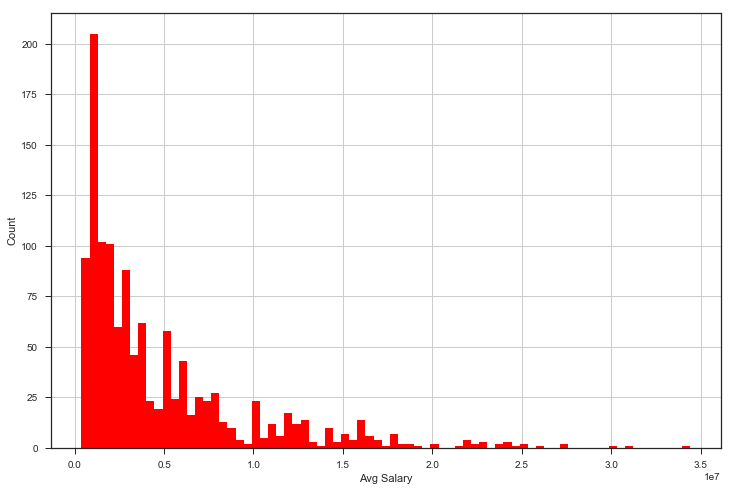

In [315]:
## Check distribution by Salary

plt.figure(figsize=(12, 8))
plt.hist(df['Salary'], bins=75, color='r')
plt.xlabel('Avg Salary')
plt.ylabel('Count')
plt.grid()
plt.show()

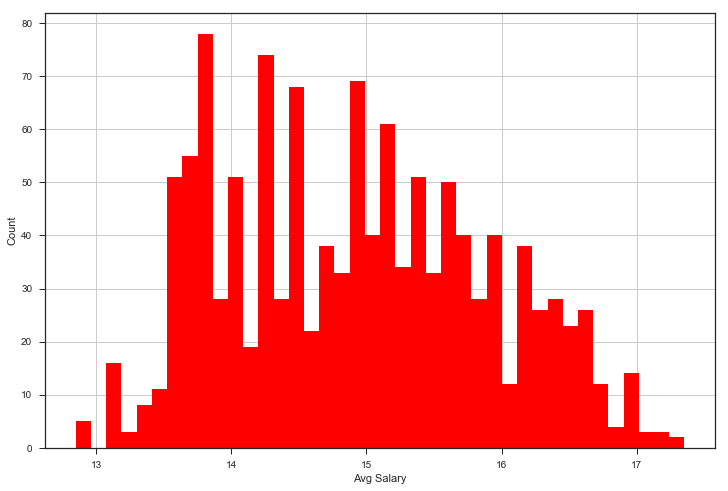

In [316]:
dfY_log = np.log(df['Salary'])

plt.figure(figsize=(12, 8))
plt.hist(dfY_log, bins=40, color='r')
plt.xlabel('Avg Salary')
plt.ylabel('Count')
plt.grid()
plt.show()

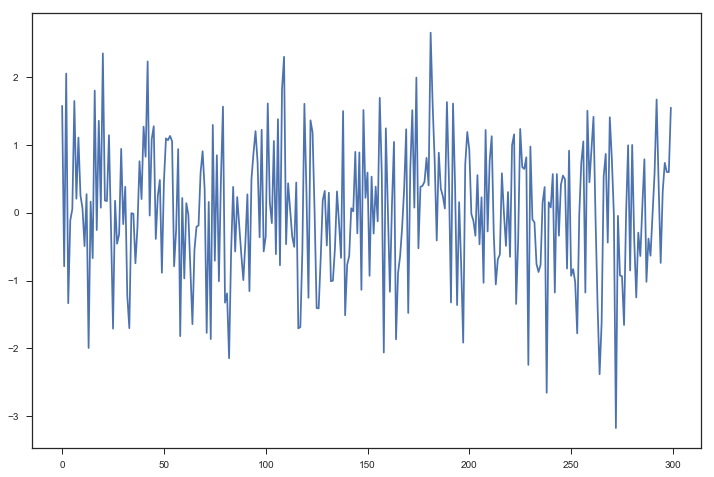

In [317]:
## Checking Gaussina white noise based on the year.

date = df['Yr'].copy()
date = sp.stats.norm.rvs(size=300)
plt.figure(figsize=(12, 8))
plt.plot(date)

In [318]:
## Grasping the number of players who sign a FA contract by year

df.groupby('Yr').count()['Name']

Yr
2005    109
2006     81
2007     91
2009    215
2010     91
2011     88
2012    117
2013    120
2014    105
2015    119
2016     89
Name: Name, dtype: int64

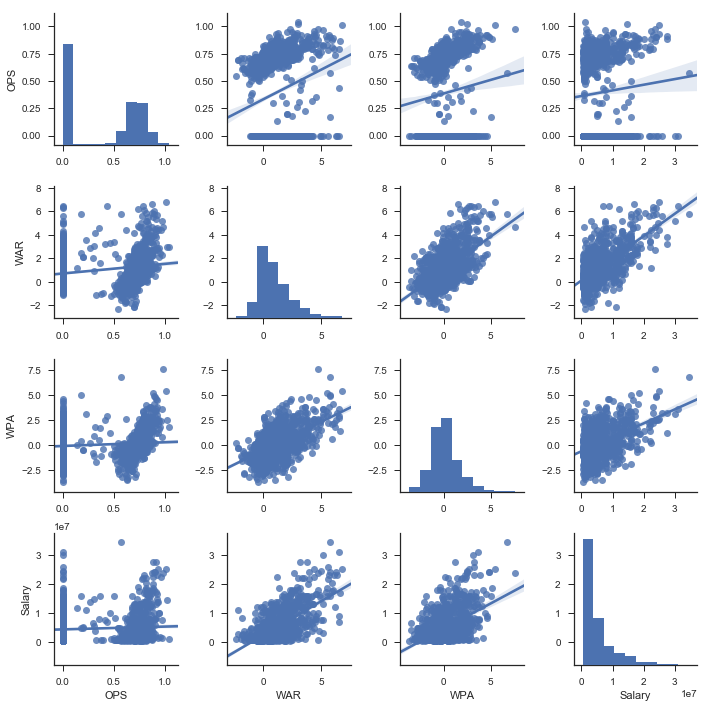

In [319]:
## Check the relationship between 'Salary' and the major indicators chosen among the various performance indicators by pairplot.

cols = ["OPS", "WAR", "WPA", "Salary"]
sns.set(style="ticks")
g = sns.pairplot(df[cols], kind="reg")

#### * Encoding Two Categorical Columns

In [320]:
# def encode_df_x1(df):
    
#     ## categorical variables of Yr
#     df_yr_le = LabelEncoder()
#     df['Yr'] = df_yr_le.fit_transform(df['Yr'])
    
#     enc_dict_yr = {'Yr' : df_yr_le}
    
#     return df, enc_dict_yr
    
# def encode_df_x2(df):
    
#     ## categorical variables of Team
#     df_team_le = LabelEncoder()
#     df['Team'] = df_team_le.fit_transform(df['Team'])
    
#     enc_dict_team = {'Team' : df_team_le}
    
#     return df, enc_dict_team

# train_df_x1 = encode_df_x1(df)
# train_df_x2 = encode_df_x2(df)

In [321]:
df.tail()

,Name,C(Team)[Angels],C(Team)[Astros],C(Team)[Athletics],C(Team)[Blue Jays],C(Team)[Braves],C(Team)[Brewers],C(Team)[Cardinals],C(Team)[Cubs],C(Team)[Diamondbacks],C(Team)[Dodgers],C(Team)[Giants],C(Team)[Indians],C(Team)[Mariners],C(Team)[Marlins],C(Team)[Mets],C(Team)[Nationals],C(Team)[Orioles],C(Team)[Padres],C(Team)[Phillies],C(Team)[Pirates],C(Team)[Rangers],C(Team)[Rays],C(Team)[Red Sox],C(Team)[Reds],C(Team)[Rockies],C(Team)[Royals],C(Team)[Tigers],C(Team)[Twins],C(Team)[White Sox],C(Team)[Yankees],Yr,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP,Salary
1220,Trevor Plouffe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2016,84.0,319.0,344.0,83.0,57.0,13.0,1.0,12.0,35.0,47.0,19.0,0.0,60.0,5.5,17.4,0.32,0.284,2.0,3.0,1.0,11.0,1.0,0.0,-8.4,0.160,0.311,-2.1,0.260,0.303,0.420,0.723,-0.4,91.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,5250000.0
1221,Tyson Ross,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.1,0.0,-0.24,0.0,1.0,1.0,0.0,5.1,9.0,0.0,1.0,5.0,8.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,27.0,1.0,0.0,1.69,8.44,5.0,14.8,47.4,0.0,33.3,11.81,0.474,2.96,1.88,6000000.0
1222,Welington Castillo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,113.0,416.0,457.0,110.0,72.0,24.0,0.0,14.0,41.0,68.0,33.0,3.0,121.0,7.2,26.5,0.27,0.337,4.0,4.0,0.0,5.0,2.0,0.0,9.8,0.159,0.319,0.4,0.264,0.322,0.423,0.745,1.6,91.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,6500000.0
1223,Wilson Ramos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,131.0,482.0,523.0,148.0,101.0,25.0,0.0,22.0,58.0,80.0,35.0,2.0,79.0,6.7,15.1,0.44,0.327,2.0,4.0,0.0,17.0,0.0,0.0,8.4,0.189,0.361,18.7,0.307,0.354,0.496,0.850,3.4,124.0,2.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,6250000.0
1224,Yoenis Cespedes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,132.0,479.0,543.0,134.0,77.0,25.0,1.0,31.0,72.0,86.0,51.0,8.0,108.0,9.4,19.9,0.47,0.298,7.0,6.0,0.0,14.0,3.0,1.0,-9.2,0.251,0.369,22.8,0.280,0.354,0.530,0.884,3.2,135.0,3.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,27500000.0


## * Splitting Dependent & Independent Variables

In [326]:
df_x = df.iloc[:, 1:98]

In [327]:
print(df_x.shape)
df_x.tail()

(1225, 97)


,C(Team)[Angels],C(Team)[Astros],C(Team)[Athletics],C(Team)[Blue Jays],C(Team)[Braves],C(Team)[Brewers],C(Team)[Cardinals],C(Team)[Cubs],C(Team)[Diamondbacks],C(Team)[Dodgers],C(Team)[Giants],C(Team)[Indians],C(Team)[Mariners],C(Team)[Marlins],C(Team)[Mets],C(Team)[Nationals],C(Team)[Orioles],C(Team)[Padres],C(Team)[Phillies],C(Team)[Pirates],C(Team)[Rangers],C(Team)[Rays],C(Team)[Red Sox],C(Team)[Reds],C(Team)[Rockies],C(Team)[Royals],C(Team)[Tigers],C(Team)[Twins],C(Team)[White Sox],C(Team)[Yankees],Yr,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP
1220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2016,84.0,319.0,344.0,83.0,57.0,13.0,1.0,12.0,35.0,47.0,19.0,0.0,60.0,5.5,17.4,0.32,0.284,2.0,3.0,1.0,11.0,1.0,0.0,-8.4,0.160,0.311,-2.1,0.260,0.303,0.420,0.723,-0.4,91.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.1,0.0,-0.24,0.0,1.0,1.0,0.0,5.1,9.0,0.0,1.0,5.0,8.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,27.0,1.0,0.0,1.69,8.44,5.0,14.8,47.4,0.0,33.3,11.81,0.474,2.96,1.88
1222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,113.0,416.0,457.0,110.0,72.0,24.0,0.0,14.0,41.0,68.0,33.0,3.0,121.0,7.2,26.5,0.27,0.337,4.0,4.0,0.0,5.0,2.0,0.0,9.8,0.159,0.319,0.4,0.264,0.322,0.423,0.745,1.6,91.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,131.0,482.0,523.0,148.0,101.0,25.0,0.0,22.0,58.0,80.0,35.0,2.0,79.0,6.7,15.1,0.44,0.327,2.0,4.0,0.0,17.0,0.0,0.0,8.4,0.189,0.361,18.7,0.307,0.354,0.496,0.850,3.4,124.0,2.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,132.0,479.0,543.0,134.0,77.0,25.0,1.0,31.0,72.0,86.0,51.0,8.0,108.0,9.4,19.9,0.47,0.298,7.0,6.0,0.0,14.0,3.0,1.0,-9.2,0.251,0.369,22.8,0.280,0.354,0.530,0.884,3.2,135.0,3.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00


In [328]:
print(min(df['wRAA']))
print(min(df['Def']))
print(min(df['WAR']))
print(min(df['WPA']))

-32.1
-44.8
-2.3
-3.68


In [329]:
df_x_temp = df_x.copy()
df_x_temp[df_x_temp < 0] = 0
df_x = df_x_temp
df_x.head(10)

,C(Team)[Angels],C(Team)[Astros],C(Team)[Athletics],C(Team)[Blue Jays],C(Team)[Braves],C(Team)[Brewers],C(Team)[Cardinals],C(Team)[Cubs],C(Team)[Diamondbacks],C(Team)[Dodgers],C(Team)[Giants],C(Team)[Indians],C(Team)[Mariners],C(Team)[Marlins],C(Team)[Mets],C(Team)[Nationals],C(Team)[Orioles],C(Team)[Padres],C(Team)[Phillies],C(Team)[Pirates],C(Team)[Rangers],C(Team)[Rays],C(Team)[Red Sox],C(Team)[Reds],C(Team)[Rockies],C(Team)[Royals],C(Team)[Tigers],C(Team)[Twins],C(Team)[White Sox],C(Team)[Yankees],Yr,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005,143.0,511.0,565.0,124.0,88.0,19.0,1.0,16.0,61.0,60.0,35.0,3.0,92.0,6.2,16.3,0.38,0.264,9.0,6.0,4.0,16.0,9.0,3.0,0.0,0.135,0.296,0.0,0.243,0.299,0.378,0.677,0.2,80.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.6,0.0,0.09,4.0,0.0,0.0,0.0,72.1,47.0,6.0,23.0,54.0,21.0,0.0,1.0,0.0,18.0,5.0,2.0,2.0,0.0,286.0,0.0,0.75,2.86,6.72,2.35,10.8,39.5,7.8,81.1,2.24,0.207,3.77,0.97
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,1.7,0.0,0.00,11.0,5.0,22.0,0.0,128.2,140.0,14.0,44.0,100.0,70.0,0.0,0.0,0.0,61.0,5.0,0.0,6.0,0.0,568.0,5.0,0.98,3.08,6.99,2.27,9.9,40.8,9.6,70.3,4.27,0.311,4.02,1.43
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005,129.0,416.0,460.0,125.0,100.0,23.0,0.0,2.0,49.0,37.0,29.0,1.0,64.0,6.3,13.9,0.45,0.348,7.0,3.0,5.0,5.0,19.0,4.0,15.5,0.070,0.323,0.0,0.300,0.354,0.370,0.724,3.2,98.0,0.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2005,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.00,2.0,5.0,0.0,0.0,52.0,62.0,10.0,14.0,38.0,47.0,1.0,2.0,1.0,44.0,2.0,10.0,3.0,0.0,231.0,1.0,1.73,2.42,6.58,2.71,10.4,40.5,16.1,48.4,7.62,0.311,4.98,1.46
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005,96.0,250.0,273.0,58.0,43.0,8.0,4.0,3.0,25.0,24.0,11.0,0.0,30.0,4.0,11.0,0.37,0.250,5.0,3.0,4.0,6.0,7.0,2.0,11.0,0.100,0.268,0.0,0.232,0.275,0.332,0.607,0.7,59.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005,130.0,435.0,478.0,115.0,80.0,30.0,1.0,9.0,47.0,45.0,31.0,10.0,81.0,6.8,19.3,0.38,0.316,5.0,3.0,4.0,13.0,5.0,3.0,11.8,0.140,0.320,0.0,0.269,0.323,0.410,0.733,2.1,96.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [330]:
df_y = pd.DataFrame(df['Salary'])

print(df_y.shape)
df_y.tail()

(1225, 1)


,Salary
1220,5250000.0
1221,6000000.0
1222,6500000.0
1223,6250000.0
1224,27500000.0


In [331]:
df_x_corr = df_x.corr()
df_x_corr.tail()

,C(Team)[Angels],C(Team)[Astros],C(Team)[Athletics],C(Team)[Blue Jays],C(Team)[Braves],C(Team)[Brewers],C(Team)[Cardinals],C(Team)[Cubs],C(Team)[Diamondbacks],C(Team)[Dodgers],C(Team)[Giants],C(Team)[Indians],C(Team)[Mariners],C(Team)[Marlins],C(Team)[Mets],C(Team)[Nationals],C(Team)[Orioles],C(Team)[Padres],C(Team)[Phillies],C(Team)[Pirates],C(Team)[Rangers],C(Team)[Rays],C(Team)[Red Sox],C(Team)[Reds],C(Team)[Rockies],C(Team)[Royals],C(Team)[Tigers],C(Team)[Twins],C(Team)[White Sox],C(Team)[Yankees],Yr,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP
LOB_Percent,0.005699,-0.005537,-0.037021,0.030568,-0.000766,0.027266,-0.007553,0.042945,-0.009010,0.027431,-0.010895,-0.043440,-0.031680,0.010651,-0.008682,-0.022426,-0.025102,0.028196,0.023773,0.022433,-0.005478,-0.045837,0.025025,-0.027878,0.017271,-0.015271,-0.029953,0.020354,-0.000431,0.015732,0.079649,-0.737424,-0.834416,-0.833830,-0.805638,-0.792231,-0.771840,-0.454795,-0.634219,-0.772804,-0.752884,-0.728583,-0.448724,-0.776992,-0.854971,-0.794930,-0.818162,-0.946350,-0.578303,-0.661015,-0.297222,-0.726020,-0.388487,-0.467588,-0.311780,-0.846597,-0.957012,-0.373032,-0.952412,-0.958676,-0.942325,-0.954100,-0.105135,-0.914656,0.048520,0.641647,0.632923,0.446973,0.234548,0.711523,0.678969,0.648604,0.716588,0.734023,0.654048,0.311100,0.477719,0.298027,0.653851,0.603393,0.484843,0.636549,0.207372,0.711619,0.601151,0.808438,0.864167,0.939932,0.838623,0.822940,0.948500,0.834466,1.000000,0.814397,0.959080,0.924049,0.935527
ERA,0.008942,-0.036631,-0.059216,0.021779,-0.022414,-0.000329,-0.023013,0.055199,-0.001345,0.010480,-0.026911,-0.034935,-0.028299,0.006419,-0.004992,-0.032150,-0.005784,0.051123,0.019441,0.015606,0.011642,-0.046997,0.057900,-0.015431,0.058216,-0.005661,-0.034870,0.017765,-0.008924,0.023482,0.037486,-0.725933,-0.748055,-0.747715,-0.721790,-0.709549,-0.692196,-0.406944,-0.568412,-0.693166,-0.674748,-0.653501,-0.402022,-0.697168,-0.766132,-0.717353,-0.732783,-0.850102,-0.517558,-0.594719,-0.281065,-0.648758,-0.350253,-0.421636,-0.290901,-0.759446,-0.858991,-0.334243,-0.855103,-0.860445,-0.845780,-0.856345,-0.173522,-0.819670,-0.139077,0.549611,0.671602,0.480246,0.216034,0.644028,0.667956,0.659471,0.690091,0.618575,0.707067,0.154051,0.339133,0.302377,0.711192,0.590654,0.295164,0.559294,0.193712,0.660405,0.577670,0.863548,0.856750,0.769830,0.621890,0.561350,0.851208,0.846040,0.814397,1.000000,0.915802,0.938334,0.949867
BABIP_p,0.014858,-0.014413,-0.050414,0.025139,-0.009192,0.023986,-0.016085,0.039875,-0.004796,0.021861,-0.017780,-0.042373,-0.031123,0.011265,-0.014637,-0.027392,-0.020664,0.048932,0.014127,0.018859,0.006407,-0.057847,0.033533,-0.021523,0.035871,-0.007176,-0.031468,0.025526,0.001788,0.019152,0.080115,-0.761655,-0.835046,-0.834625,-0.805748,-0.791750,-0.773324,-0.455416,-0.634966,-0.773858,-0.753235,-0.730240,-0.448738,-0.778565,-0.855142,-0.796807,-0.817683,-0.946770,-0.577731,-0.662928,-0.303114,-0.723820,-0.391431,-0.471258,-0.319801,-0.847632,-0.957507,-0.372745,-0.952791,-0.959002,-0.942993,-0.954620,-0.116411,-0.914655,-0.029281,0.633915,0.680384,0.484102,0.246698,0.719539,0.715664,0.661457,0.734542,0.727968,0.708771,0.252911,0.437705,0.308799,0.708692,0.620064,0.431702,0.643119,0.218322,0.727164,0.625481,0.810799,0.885860,0.916899,0.792705,0.764414,0.959269,0.835728,0.959080,0.915802,1.000000,0.939387,0.985329
FIP,0.007138,-0.027367,-0.048948,0.032906,-0.013067,0.004812,-0.015875,0.061204,0.001308,0.013110,-0.025562,-0.037945,-0.025104,0.010504,-0.005714,-0.022002,-0.016265,0.030791,0.036865,0.019825,-0.010325,-0.046753,0.040421,-0.023513,0.040843,-0.008302,-0.036475,0.023352,-0.000382,0.014449,0.031226,-0.754958,-0.801940,-0.801461,-0.774317,-0.76163

In [343]:
df_temp = df_x.iloc[:, 30:]
df_temp.tail()

,Yr,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP
1220,2016,84.0,319.0,344.0,83.0,57.0,13.0,1.0,12.0,35.0,47.0,19.0,0.0,60.0,5.5,17.4,0.32,0.284,2.0,3.0,1.0,11.0,1.0,0.0,0.0,0.160,0.311,0.0,0.260,0.303,0.420,0.723,0.0,91.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1221,2016,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.1,0.0,0.00,0.0,1.0,1.0,0.0,5.1,9.0,0.0,1.0,5.0,8.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,27.0,1.0,0.0,1.69,8.44,5.0,14.8,47.4,0.0,33.3,11.81,0.474,2.96,1.88
1222,2016,113.0,416.0,457.0,110.0,72.0,24.0,0.0,14.0,41.0,68.0,33.0,3.0,121.0,7.2,26.5,0.27,0.337,4.0,4.0,0.0,5.0,2.0,0.0,9.8,0.159,0.319,0.4,0.264,0.322,0.423,0.745,1.6,91.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1223,2016,131.0,482.0,523.0,148.0,101.0,25.0,0.0,22.0,58.0,80.0,35.0,2.0,79.0,6.7,15.1,0.44,0.327,2.0,4.0,0.0,17.0,0.0,0.0,8.4,0.189,0.361,18.7,0.307,0.354,0.496,0.850,3.4,124.0,2.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1224,2016,132.0,479.0,543.0,134.0,77.0,25.0,1.0,31.0,72.0,86.0,51.0,8.0,108.0,9.4,19.9,0.47,0.298,7.0,6.0,0.0,14.0,3.0,1.0,0.0,0.251,0.369,22.8,0.280,0.354,0.530,0.884,3.2,135.0,3.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00


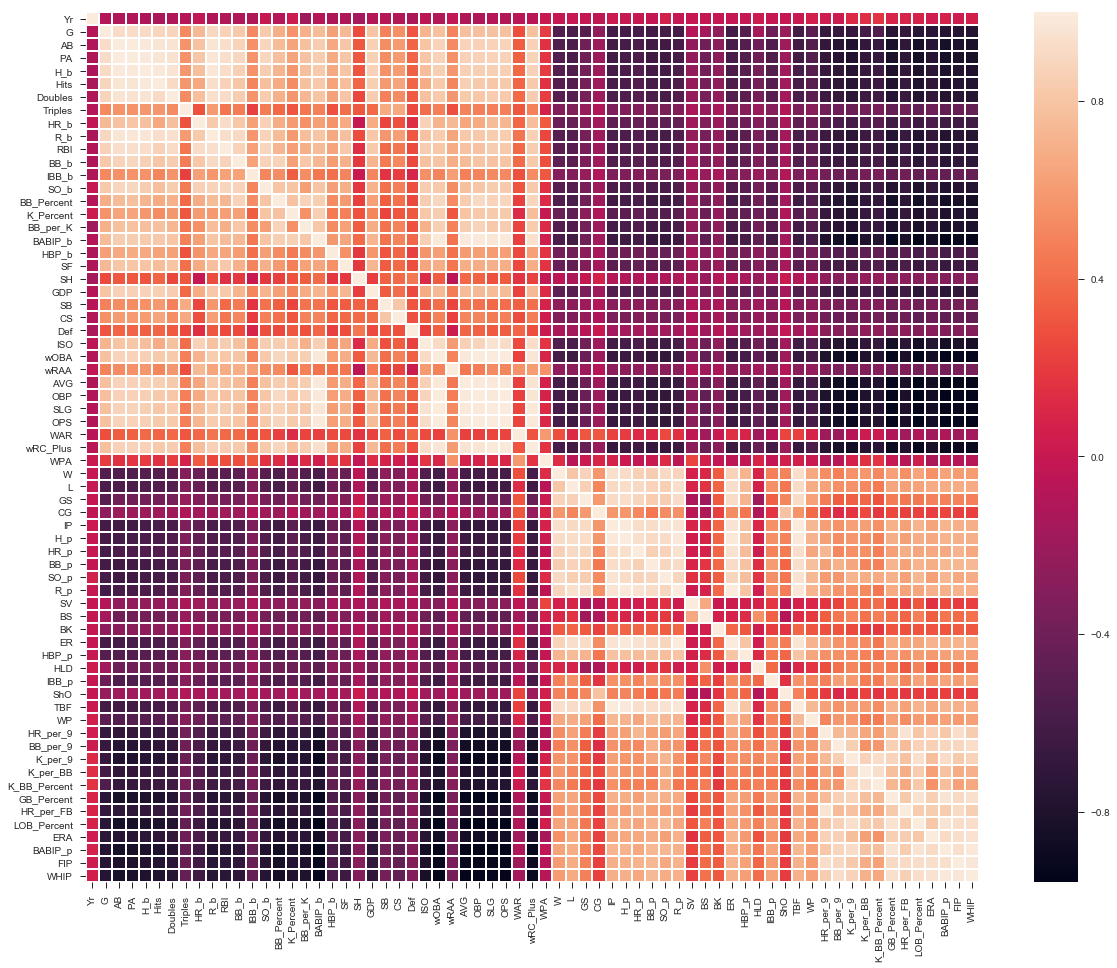

In [344]:
plt.figure(figsize=(20, 16))
corr_data = pd.DataFrame.corr(df_temp)
sns.heatmap(corr_data, annot=False, linewidths=1)
plt.show()

## * Scaling the variables

In [144]:
cols = df_x.columns.tolist()

cat_cols = cols[:30]
num_cols = cols[30:]

cat_cols_list = []
num_cols_list = []

def r_style_cat_cols(convert1, convert2):
    for item1 in cat_cols:
        cat_cols_list.append("C(" + item1 + ")")
        
    for item2 in num_cols:
        num_cols_list.append("scale(" + "np.log1p(" + item2 + ")" + ")")
        
    return cat_cols_list, num_cols_list

converted_cols = r_style_cat_cols(cat_cols, num_cols)

log_y = "np.log1p(Salary) ~ "
converted_cols_list = " + ".join(cat_cols_list + num_cols_list)

## zero; To eliminate Intercept of Scaling categorical valiable.
zero = ' + 0'

ols_str_list = log_y + converted_cols_list + zero
merge_converted_cols = cat_cols_list + num_cols_list

In [146]:
ols_str_list

'np.log1p(Salary) ~ C(Yr) + C(Team) + scale(np.log1p(G)) + scale(np.log1p(AB)) + scale(np.log1p(PA)) + scale(np.log1p(H_b)) + scale(np.log1p(Hits)) + scale(np.log1p(Doubles)) + scale(np.log1p(Triples)) + scale(np.log1p(HR_b)) + scale(np.log1p(R_b)) + scale(np.log1p(RBI)) + scale(np.log1p(BB_b)) + scale(np.log1p(IBB_b)) + scale(np.log1p(SO_b)) + scale(np.log1p(BB_Percent)) + scale(np.log1p(K_Percent)) + scale(np.log1p(BB_per_K)) + scale(np.log1p(BABIP_b)) + scale(np.log1p(HBP_b)) + scale(np.log1p(SF)) + scale(np.log1p(SH)) + scale(np.log1p(GDP)) + scale(np.log1p(SB)) + scale(np.log1p(CS)) + scale(np.log1p(Def)) + scale(np.log1p(ISO)) + scale(np.log1p(wOBA)) + scale(np.log1p(wRAA)) + scale(np.log1p(AVG)) + scale(np.log1p(OBP)) + scale(np.log1p(SLG)) + scale(np.log1p(OPS)) + scale(np.log1p(WAR)) + scale(np.log1p(wRC_Plus)) + scale(np.log1p(WPA)) + scale(np.log1p(W)) + scale(np.log1p(L)) + scale(np.log1p(GS)) + scale(np.log1p(CG)) + scale(np.log1p(IP)) + scale(np.log1p(H_p)) + scale(np.log

In [153]:
log_df = pd.concat([df_x, df_y], axis=1)
log_df.tail()

,Yr,Team,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP,Salary
1220,10,29,84,319.0,344.0,83.0,57.0,13.0,1.0,12.0,35.0,47.0,19.0,0.0,60.0,5.5,17.4,0.32,0.284,2.0,3.0,1.0,11.0,1.0,0.0,0.0,0.160,0.311,0.0,0.260,0.303,0.420,0.723,0.0,91.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,5250000.0
1221,10,19,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.1,0.0,0.00,0.0,1.0,1.0,0.0,5.1,9.0,0.0,1.0,5.0,8.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,27.0,1.0,0.0,1.69,8.44,5.0,14.8,47.4,0.0,33.3,11.81,0.474,2.96,1.88,6000000.0
1222,10,10,113,416.0,457.0,110.0,72.0,24.0,0.0,14.0,41.0,68.0,33.0,3.0,121.0,7.2,26.5,0.27,0.337,4.0,4.0,0.0,5.0,2.0,0.0,9.8,0.159,0.319,0.4,0.264,0.322,0.423,0.745,1.6,91.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,6500000.0
1223,10,17,131,482.0,523.0,148.0,101.0,25.0,0.0,22.0,58.0,80.0,35.0,2.0,79.0,6.7,15.1,0.44,0.327,2.0,4.0,0.0,17.0,0.0,0.0,8.4,0.189,0.361,18.7,0.307,0.354,0.496,0.850,3.4,124.0,2.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,6250000.0
1224,10,16,132,479.0,543.0,134.0,77.0,25.0,1.0,31.0,72.0,86.0,51.0,8.0,108.0,9.4,19.9,0.47,0.298,7.0,6.0,0.0,14.0,3.0,1.0,0.0,0.251,0.369,22.8,0.280,0.354,0.530,0.884,3.2,135.0,3.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,27500000.0


## * Checking P-VALUE using from-formula

In [154]:
model0 = sm.OLS.from_formula(ols_str_list, data=log_df)
result0 = model0.fit()
print(result0.summary())

                            OLS Regression Results                            
Dep. Variable:       np.log1p(Salary)   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     14.77
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          3.33e-150
Time:                        15:30:29   Log-Likelihood:                -1157.5
No. Observations:                1225   AIC:                             2531.
Df Residuals:                    1117   BIC:                             3083.
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
C(Yr)[0]      

## * Eliminating Outliers above ANALYSIS

In [156]:
def elim_outliers(result, dfX):
    influence = result.get_influence()
    cooks_d2, pvals = influence.cooks_distance
    fox_cr = 4 / (len(dfY) - len(dfX.columns) - 1)
    idx = np.where(cooks_d2 > fox_cr)[0]
    
    return idx

In [161]:
idx0_num = elim_outliers(result0, log_df)

print(idx0_num, '\n')
print("Outliers: {}".format(len(idx0_num)))

[  14   15   24   29   36   50   52   56   65   77   89  115  118  119  121
  125  132  144  146  147  155  161  174  178  216  220  244  253  257  267
  272  274  287  291  314  393  394  397  433  438  445  449  502  507  514
  527  539  542  605  696  747  772  785  793  802  826  847  945  985  990
 1028 1033 1055 1061 1106 1196 1198 1221] 

Outliers: 68


In [164]:
log_df.shape

(1225, 69)

In [170]:
dfX1 = log_df.drop(idx0_num)
dfX1.shape

(1157, 69)

In [171]:
model1 = sm.OLS.from_formula(ols_str_list, data=dfX1)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:       np.log1p(Salary)   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     20.83
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          5.40e-193
Time:                        16:30:52   Log-Likelihood:                -922.03
No. Observations:                1157   AIC:                             2058.
Df Residuals:                    1050   BIC:                             2599.
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
C(Yr)[0]      

In [179]:
df_log_y = log_df['Salary']
df_log_y.tail()

1220     5250000.0
1221     6000000.0
1222     6500000.0
1223     6250000.0
1224    27500000.0
Name: Salary, dtype: float64

In [ ]:
model1_1 = sm.OLS(df_log_y, dfX1)
result1_1 = model1_1.fit()
print(result1_1.summary())

## * Filtrating P-VALUE under 5% above model

In [166]:
def extracted_pvals(result, cond):
    pvals = pd.DataFrame(result.pvalues)
    pvals.columns = ['P_values']
    pvals['P_values'] = pvals[pvals.P_values < cond]
    pvals = pvals.dropna().sort_values('P_values')
    
    return pvals

In [173]:
dfX1.sample(3)

,Yr,Team,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP,Salary
436,3,4,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.00,0.000,0.000,0.00,1.4,0.0,2.63,7.0,3.0,0.0,0.0,57.2,43.0,4.0,16.0,56.0,17.0,11.0,3.0,0.0,16.0,2.0,4.0,3.0,0.0,227.0,2.0,0.62,2.50,8.74,3.5,17.6,38.2,6.1,79.4,2.50,0.262,2.99,1.02,3500000.0
148,1,28,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.00,0.000,0.000,0.00,2.1,0.0,0.76,17.0,8.0,33.0,0.0,204.0,195.0,23.0,62.0,99.0,97.0,0.0,0.0,0.0,87.0,9.0,0.0,2.0,0.0,849.0,5.0,1.01,2.74,4.37,1.6,4.4,50.0,10.8,72.3,3.84,0.262,4.69,1.26,8000000.0
580,4,19,104,295.0,336.0,62.0,42.0,10.0,0.0,10.0,34.0,36.0,31.0,1.0,69.0,9.2,20.5,0.45,0.236,6.0,4.0,0.0,3.0,6.0,1.0,0.0,0.136,0.288,0.0,0.21,0.295,0.346,0.64,0.0,81.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,1100000.0


In [174]:
dfX2_values

array(['C(Yr)[0]', 'C(Yr)[10]', 'C(Yr)[9]', 'C(Yr)[7]', 'C(Yr)[6]',
       'C(Yr)[8]', 'C(Yr)[4]', 'C(Yr)[3]', 'C(Yr)[2]', 'C(Yr)[1]',
       'C(Yr)[5]', 'scale(np.log1p(WAR))', 'scale(np.log1p(G))',
       'scale(np.log1p(WPA))', 'scale(np.log1p(SV))', 'scale(np.log1p(L))',
       'scale(np.log1p(GS))', 'scale(np.log1p(GB_Percent))',
       'scale(np.log1p(SH))', 'scale(np.log1p(R_p))',
       'scale(np.log1p(HR_per_FB))', 'scale(np.log1p(HR_p))',
       'scale(np.log1p(W))', 'scale(np.log1p(GDP))',
       'scale(np.log1p(K_BB_Percent))', 'scale(np.log1p(IBB_b))',
       'C(Team)[T.15]', 'scale(np.log1p(SLG))', 'C(Team)[T.14]',
       'scale(np.log1p(LOB_Percent))', 'scale(np.log1p(wRAA))'], dtype=object)

In [ ]:
pvals1 = extracted_pvals(result1, 0.05)

dfX2_values = pvals1.index.values
dfX2 = dfX1.loc[:, dfX2_values]
dfX2.tail()

## * Checking p-value using OLS Analysis

### * 1st OLS analysis

In [21]:
dfX1 = sm.add_constant(df_x)
dfY = pd.DataFrame(df_y, columns=["Salary"])
df_mlb = pd.concat([dfX1, dfY], axis=1)

In [22]:
model1 = sm.OLS(dfY, dfX1)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     35.88
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          1.67e-236
Time:                        12:06:50   Log-Likelihood:                -19942.
No. Observations:                1225   AIC:                         4.002e+04
Df Residuals:                    1156   BIC:                         4.037e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.652e+06   1.09e+06      2.430   

## * Eliminating Outliers above OLS analysis RESULT

In [23]:
def elim_outliers(result, dfX):
    influence = result.get_influence()
    cooks_d2, pvals = influence.cooks_distance
    fox_cr = 4 / (len(dfY) - len(dfX.columns) - 1)
    idx = np.where(cooks_d2 > fox_cr)[0]
    
    return idx

In [24]:
idx1 = elim_outliers(result1, dfX1)
print(idx1, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx1)))

[   7   11   13   19   24   28   32   36   44   65   66   77  105  113  115
  119  144  153  155  157  174  187  197  200  202  220  244  248  252  259
  270  272  291  314  331  391  393  394  397  401  405  411  416  438  446
  460  499  507  539  540  549  558  571  597  605  683  737  743  747  753
  757  782  791  794  797  801  804  814  826  837  914  918  950  958  993
 1000 1020 1041 1049 1059 1073 1077 1088 1091 1096 1106 1115 1135 1156 1188
 1196 1209 1221 1224] 

There are '94' Outliers according to Fox criteria


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:309: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In [25]:
dfX1_idx = dfX1.drop(idx1)
dfY_idx = dfY.drop(idx1)

### * 1-1 OLS analysis

In [26]:
dfX1_idx_elim = sm.add_constant(dfX1_idx)
model1_idx_elim = sm.OLS(dfY_idx, dfX1_idx_elim)
result1_idx_elim = model1_idx_elim.fit()
print(result1_idx_elim.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     43.86
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          5.01e-260
Time:                        12:06:50   Log-Likelihood:                -18065.
No. Observations:                1131   AIC:                         3.627e+04
Df Residuals:                    1062   BIC:                         3.661e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.423e+06   9.63e+05      2.516   

## * Filtrating P-VALUE under 5% above model

In [27]:
def extracted_pvals(result, cond):
    pvals = pd.DataFrame(result.pvalues)
    pvals.columns = ['P_values']
    pvals['P_values'] = pvals[pvals.P_values < cond]
    pvals = pvals.dropna().sort_values('P_values')
    
    return pvals

In [28]:
df_elim_pvals = extracted_pvals(result1_idx_elim, 0.05)

extracted_feature_elim = df_elim_pvals.index.values
extracted_elim_x = dfX1_idx_elim.loc[:, extracted_feature_elim]

### * 1-2 OLS analysis

In [29]:
dfX1_idx_elim2 = sm.add_constant(extracted_elim_x)

model1_idx_elim2 = sm.OLS(dfY_idx, dfX1_idx_elim2)
result1_idx_elim2 = model1_idx_elim2.fit()
print(result1_idx_elim2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     125.7
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          1.76e-275
Time:                        12:06:50   Log-Likelihood:                -18132.
No. Observations:                1131   AIC:                         3.631e+04
Df Residuals:                    1109   BIC:                         3.642e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
WAR         9.398e+05   1.06e+05      8.865      0.0

## * Filtrating P-VALUE under 5% above model2

In [30]:
df_elim_pvals2 = extracted_pvals(result1_idx_elim2, 0.05)

extracted_feature_elim2 = df_elim_pvals2.index.values
extracted_elim_x2 = dfX1_idx_elim2.loc[:, extracted_feature_elim2]

### * 1-3 OLS analysis

In [31]:
dfX1_idx_elim3 = sm.add_constant(extracted_elim_x2)

model1_idx_elim3 = sm.OLS(dfY_idx, dfX1_idx_elim3)
result1_idx_elim3 = model1_idx_elim3.fit()
print(result1_idx_elim3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     155.2
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          5.08e-279
Time:                        12:06:50   Log-Likelihood:                -18134.
No. Observations:                1131   AIC:                         3.630e+04
Df Residuals:                    1113   BIC:                         3.639e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SO_p          6.8e+04   6504.778     10.453      0.0

## * Variance Inflation Factor(VIF) for eliminating Multi-Collinearity

In [32]:
def var_inf_fac(dfX):
    vif = pd.DataFrame()
    vif['VIF Factor'] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]
    vif['feature'] = dfX.columns
    return vif

In [33]:
df_vif = var_inf_fac(dfX1_idx_elim3)

In [34]:
df_vif['VIF Factor'].sort_values(ascending=False)

14    315.223129
8     301.324528
12     53.621029
0      18.537652
13     14.274531
10     13.680062
5      13.408084
15     11.981319
6       9.147663
16      7.300934
7       3.490162
2       3.433268
4       3.238754
17      2.544119
11      2.502142
9       2.038219
3       1.738723
1       1.108230
Name: VIF Factor, dtype: float64

In [35]:
df_vif1_3 = df_vif.copy()
# del df_vif1_3['VIF Factor'][14], df_vif1_3['VIF Factor'][8]

In [36]:
df_vif1_3_del_list = list(df_vif1_3.loc[df_vif1_3['VIF Factor'] > 100, 'feature'])

In [37]:
df_vif1_3_del_list

['ER', 'R_p']

In [38]:
dfX1_idx_elim3.drop(df_vif1_3_del_list, axis=1, inplace=True)

In [39]:
print(len(dfX1_idx_elim3.columns.tolist()))
dfX1_idx_elim3.tail()

16


,SO_p,Yr,WAR,SV,wRAA,R_b,G,GDP,IBB_p,K_per_9,WPA,const,OBP,HR_p,W,HLD
1218,47.0,10,0.1,0.0,0.0,0.0,77,0.0,2.0,6.93,1.28,1.0,0.000,8.0,4.0,12.0
1219,66.0,10,0.0,0.0,0.0,0.0,50,0.0,3.0,9.05,0.00,1.0,0.000,7.0,4.0,4.0
1220,0.0,10,0.0,0.0,0.0,35.0,84,11.0,0.0,0.00,0.50,1.0,0.303,0.0,0.0,0.0
1222,0.0,10,1.6,0.0,0.4,41.0,113,5.0,0.0,0.00,0.64,1.0,0.322,0.0,0.0,0.0
1223,0.0,10,3.4,0.0,18.7,58.0,131,17.0,0.0,0.00,2.58,1.0,0.354,0.0,0.0,0.0


### * 1-4 OLS analysis

In [40]:
dfX1_idx_elim3_1 = sm.add_constant(dfX1_idx_elim3)

model1_idx_elim3_1 = sm.OLS(dfY_idx, dfX1_idx_elim3_1)
result1_idx_elim3_1 = model1_idx_elim3_1.fit()
print(result1_idx_elim3_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     160.6
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          7.95e-266
Time:                        12:06:50   Log-Likelihood:                -18170.
No. Observations:                1131   AIC:                         3.637e+04
Df Residuals:                    1115   BIC:                         3.645e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SO_p        5.474e+04   6253.192      8.753      0.0

In [41]:
df_vif2 = var_inf_fac(dfX1_idx_elim3_1)

In [42]:
df_vif2['VIF Factor'].sort_values(ascending=False)

11    44.703783
0     16.096583
5     13.400511
12    12.445115
9     11.944703
6      9.134694
13     7.594621
14     7.200003
7      3.488420
2      3.410501
4      3.148814
15     2.509947
10     2.377771
8      1.945761
3      1.721254
1      1.091785
Name: VIF Factor, dtype: float64

In [43]:
df_vif1_4 = df_vif2.copy()
# del df_vif1_3['VIF Factor'][14], df_vif1_3['VIF Factor'][8]

In [44]:
df_vif1_4_del_list = list(df_vif1_4.loc[df_vif1_4['VIF Factor'] > 10, 'feature'])

In [45]:
df_vif1_4_del_list

['SO_p', 'R_b', 'K_per_9', 'const', 'OBP']

In [46]:
dfX1_idx_elim3_1.drop(df_vif1_4_del_list, axis=1, inplace=True)

In [47]:
print(len(dfX1_idx_elim3_1.columns.tolist()))
dfX1_idx_elim3_1.tail()

11


,Yr,WAR,SV,wRAA,G,GDP,IBB_p,WPA,HR_p,W,HLD
1218,10,0.1,0.0,0.0,77,0.0,2.0,1.28,8.0,4.0,12.0
1219,10,0.0,0.0,0.0,50,0.0,3.0,0.00,7.0,4.0,4.0
1220,10,0.0,0.0,0.0,84,11.0,0.0,0.50,0.0,0.0,0.0
1222,10,1.6,0.0,0.4,113,5.0,0.0,0.64,0.0,0.0,0.0
1223,10,3.4,0.0,18.7,131,17.0,0.0,2.58,0.0,0.0,0.0


### * 1-5 OLS analysis

In [48]:
dfX1_idx_elim3_2 = sm.add_constant(dfX1_idx_elim3_1)

model1_idx_elim3_2 = sm.OLS(dfY_idx, dfX1_idx_elim3_2)
result1_idx_elim3_2 = model1_idx_elim3_2.fit()
print(result1_idx_elim3_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     186.8
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          3.17e-244
Time:                        12:06:51   Log-Likelihood:                -18232.
No. Observations:                1131   AIC:                         3.649e+04
Df Residuals:                    1119   BIC:                         3.655e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.284e+05   2.76e+05     -1.190      0.2

## * Filtrating P-VALUE under 5% above model

In [49]:
df_elim_pvals3 = extracted_pvals(result1_idx_elim3_2, 0.05)

extracted_feature_elim3 = df_elim_pvals3.index.values
extracted_elim_x3 = dfX1_idx_elim3.loc[:, extracted_feature_elim3]

### * 1-6 OLS analysis

In [50]:
dfX1_idx_elim3_3 = sm.add_constant(extracted_elim_x3)

model1_idx_elim3_3 = sm.OLS(dfY_idx, dfX1_idx_elim3_3)
result1_idx_elim3_3 = model1_idx_elim3_3.fit()
print(result1_idx_elim3_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     204.7
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          1.12e-244
Time:                        12:06:51   Log-Likelihood:                -18233.
No. Observations:                1131   AIC:                         3.649e+04
Df Residuals:                    1120   BIC:                         3.654e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.627e+05   2.06e+05     -3.216      0.0

**Results of VIF analysis above OLS modeling showed that the performance of ' R-SQUARED ', ' Log - Likelihood ', ' Skewness ' and ' Kurtosis ' were rather degraded except the condition number.**

## * Scaling the variables

In [51]:
cols = df_x.columns.tolist()

cat_cols = cols[:2]
num_cols = cols[2:70]

cat_cols_list = []
num_cols_list = []

def r_style_cat_cols(convert1, convert2):
    for item1 in cat_cols:
        cat_cols_list.append("C(" + item1 + ")")
        
    for item2 in num_cols:
        num_cols_list.append("scale(" + item2 + ")")
        
    return cat_cols_list, num_cols_list

converted_cols = r_style_cat_cols(cat_cols, num_cols)

converted_cols_list = " + ".join(cat_cols_list + num_cols_list)
model_str = "Salary ~ "

## zero; To eliminate Intercept of Scaling categorical valiable.
zero = ' + 0'

ols_str_list = model_str + converted_cols_list + zero
merging_converted_cols = cat_cols_list + num_cols_list

# print(ols_str_list)
# print(converted_cols_list)
# print(converted_cols)

### * 2-a OLS analysis (Not include 'ZERO')

In [52]:
dfX2 = dmatrix(converted_cols_list, data=df_x)
dfX2_columns = dfX2.design_info.column_names
dfX2 = pd.DataFrame(dfX2, columns=dfX2_columns)

In [53]:
model2 = sm.OLS(dfY, dfX2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     24.02
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          4.10e-222
Time:                        12:06:51   Log-Likelihood:                -19906.
No. Observations:                1225   AIC:                         4.003e+04
Df Residuals:                    1117   BIC:                         4.058e+04
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            5.775e+06   2

### * 2-a-0 OLS analysis

In [54]:
model2 = sm.OLS(dfY, dfX2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     24.02
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          4.10e-222
Time:                        12:06:52   Log-Likelihood:                -19906.
No. Observations:                1225   AIC:                         4.003e+04
Df Residuals:                    1117   BIC:                         4.058e+04
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            5.775e+06   2

## * 1st Pre-processing Variables of model2-a that failed the 5% P-VALUE Condition test

In [55]:
p_values3 = extracted_pvals(result2, 0.05)
# print(len(p_values))
# print(p_values)

extracted_features3 = list(p_values3.index.values)
extracted_df_x3 = dfX2.loc[:, extracted_features3]

extracted_df_x3.tail()

,scale(G),scale(WAR),scale(SV),scale(SB),scale(wRAA),scale(SO_p),C(Yr)[T.10],scale(GDP),scale(IBB_b),C(Yr)[T.9],scale(SLG),scale(OPS),scale(HR_p),scale(OBP),scale(ER),scale(GB_Percent),scale(BK),scale(HLD),scale(W)
1220,0.130796,-0.860528,-0.271484,-0.269710,-0.395374,-0.715004,1.0,1.153062,-0.476154,0.0,0.993282,0.912641,-0.648139,0.800426,-0.672842,-0.928598,-0.299392,-0.445154,-0.628874
1221,-1.755004,-0.784712,-0.271484,-0.421406,-0.395374,-0.609591,1.0,-0.769897,-0.476154,0.0,-1.037828,-1.051964,-0.648139,-1.058482,-0.431779,1.147591,-0.299392,-0.445154,-0.628874
1222,0.789689,0.352529,-0.271484,-0.118014,-0.339063,-0.715004,1.0,0.104175,0.596068,0.0,1.007790,0.972422,-0.648139,0.916991,-0.672842,-0.928598,-0.299392,-0.445154,-0.628874
1223,1.198658,1.717219,-0.271484,-0.421406,2.237176,-0.715004,1.0,2.201948,0.238661,0.0,1.360816,1.257738,-0.648139,1.113311,-0.672842,-0.928598,-0.299392,-0.445154,-0.628874
1224,1.221379,1.565586,-0.271484,0.033683,2.814366,-0.715004,1.0,1.677505,2.383106,0.0,1.525240,1.350126,-0.648139,1.113311,-0.672842,-0.928598,-0.299392,-0.445154,-0.628874


### * 2-a-1 OLS analysis

In [56]:
dfX2_a_1 = sm.add_constant(extracted_df_x3)

model2_a_1 = sm.OLS(dfY, dfX2_a_1)
result2_a_1 = model2_a_1.fit()
print(result2_a_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     108.7
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          4.42e-245
Time:                        12:06:52   Log-Likelihood:                -20026.
No. Observations:                1225   AIC:                         4.009e+04
Df Residuals:                    1205   BIC:                         4.019e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.532e+06   9.66e+0

## * 2nd Pre-processing Variables of model2-a-1 that failed the 5% P-VALUE Condition test

In [57]:
p_values2_a_1 = extracted_pvals(result2_a_1, 0.05)

extracted_features2_a_1 = p_values2_a_1.index.values
extracted_df_x2_a_1 = dfX2_a_1.loc[:, extracted_features2_a_1]

### 2-a-2 OLS analysis

In [58]:
dfX2_a_2 = sm.add_constant(extracted_df_x2_a_1)

model2_a_2 = sm.OLS(dfY, dfX2_a_2)
result2_a_2 = model2_a_2.fit()
print(result2_a_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     121.3
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          1.22e-246
Time:                        12:06:52   Log-Likelihood:                -20027.
No. Observations:                1225   AIC:                         4.009e+04
Df Residuals:                    1207   BIC:                         4.018e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.529e+06   9.66e+04     46.910   

### * 2-b OLS analysis (Include 'ZERO')
#### [zero; Constant Term to eliminate Intercept of Scaling categorical valiable]

In [59]:
ols_str_list

'Salary ~ C(Yr) + C(Team) + scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP) + 0'

### * 2-b OLS analysis

In [60]:
model2_b = sm.OLS.from_formula(ols_str_list, df)
result2_b = model2_b.fit()
print(result2_b.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     23.71
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          5.67e-220
Time:                        12:06:53   Log-Likelihood:                -19911.
No. Observations:                1225   AIC:                         4.004e+04
Df Residuals:                    1117   BIC:                         4.059e+04
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(Yr)[0]              5.77e+06    

## * 1st Pre-processing Variables of model2-b that failed the 5% P-VALUE Condition test

In [61]:
df_x_copy = df_x.copy()
df_x_copy_list = list(df_x_copy.columns)
df_x_conv_list = cat_cols_list + num_cols_list

for item, item2 in zip(df_x_copy_list, df_x_conv_list):
    df_x_copy.rename(columns={item : item2}, inplace=True)
        
df_x_copy.tail()

,C(Yr),C(Team),scale(G),scale(AB),scale(PA),scale(H_b),scale(Hits),scale(Doubles),scale(Triples),scale(HR_b),scale(R_b),scale(RBI),scale(BB_b),scale(IBB_b),scale(SO_b),scale(BB_Percent),scale(K_Percent),scale(BB_per_K),scale(BABIP_b),scale(HBP_b),scale(SF),scale(SH),scale(GDP),scale(SB),scale(CS),scale(Def),scale(ISO),scale(wOBA),scale(wRAA),scale(AVG),scale(OBP),scale(SLG),scale(OPS),scale(WAR),scale(wRC_Plus),scale(WPA),scale(W),scale(L),scale(GS),scale(CG),scale(IP),scale(H_p),scale(HR_p),scale(BB_p),scale(SO_p),scale(R_p),scale(SV),scale(BS),scale(BK),scale(ER),scale(HBP_p),scale(HLD),scale(IBB_p),scale(ShO),scale(TBF),scale(WP),scale(HR_per_9),scale(BB_per_9),scale(K_per_9),scale(K_per_BB),scale(K_BB_Percent),scale(GB_Percent),scale(HR_per_FB),scale(LOB_Percent),scale(ERA),scale(BABIP_p),scale(FIP),scale(WHIP)
1220,10,29,84,319.0,344.0,83.0,57.0,13.0,1.0,12.0,35.0,47.0,19.0,0.0,60.0,5.5,17.4,0.32,0.284,2.0,3.0,1.0,11.0,1.0,0.0,0.0,0.160,0.311,0.0,0.260,0.303,0.420,0.723,0.0,91.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1221,10,19,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.1,0.0,0.00,0.0,1.0,1.0,0.0,5.1,9.0,0.0,1.0,5.0,8.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,27.0,1.0,0.0,1.69,8.44,5.0,14.8,47.4,0.0,33.3,11.81,0.474,2.96,1.88
1222,10,10,113,416.0,457.0,110.0,72.0,24.0,0.0,14.0,41.0,68.0,33.0,3.0,121.0,7.2,26.5,0.27,0.337,4.0,4.0,0.0,5.0,2.0,0.0,9.8,0.159,0.319,0.4,0.264,0.322,0.423,0.745,1.6,91.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1223,10,17,131,482.0,523.0,148.0,101.0,25.0,0.0,22.0,58.0,80.0,35.0,2.0,79.0,6.7,15.1,0.44,0.327,2.0,4.0,0.0,17.0,0.0,0.0,8.4,0.189,0.361,18.7,0.307,0.354,0.496,0.850,3.4,124.0,2.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1224,10,16,132,479.0,543.0,134.0,77.0,25.0,1.0,31.0,72.0,86.0,51.0,8.0,108.0,9.4,19.9,0.47,0.298,7.0,6.0,0.0,14.0,3.0,1.0,0.0,0.251,0.369,22.8,0.280,0.354,0.530,0.884,3.2,135.0,3.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00


In [62]:
ols_model_cols = " + ".join(df_x_copy.columns) + zero
ols_model_cols

'C(Yr) + C(Team) + scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP) + 0'

In [63]:
dfX2_b = dmatrix(ols_model_cols, data=df_x)
dfX2_b_columns = dfX2_b.design_info.column_names
dfX2_b = pd.DataFrame(dfX2_b, columns=dfX2_b_columns)

In [64]:
p_values2_b = extracted_pvals(result2_b, 0.05)
# # print(len(p_values2_b))
# print(p_values2_b)

extracted_features2_b = list(p_values2_b.index.values)
extracted_df_x2_b = dfX2_b.loc[:, extracted_features2_b]

extracted_df_x2_b.tail()

,scale(G),scale(SV),scale(IBB_b),scale(GDP),scale(SB),scale(WAR),scale(wRAA),scale(SO_p),scale(HR_p),scale(SLG),C(Yr)[10],C(Yr)[9],scale(ER),scale(BK),C(Yr)[1],scale(OPS),C(Yr)[8],C(Yr)[7],C(Yr)[2],scale(OBP),C(Yr)[6],scale(BB_per_9)
1220,0.130796,-0.271484,-0.476154,1.153062,-0.269710,-0.860528,-0.395374,-0.715004,-0.648139,0.993282,1.0,0.0,-0.672842,-0.299392,0.0,0.912641,0.0,0.0,0.0,0.800426,0.0,-0.850686
1221,-1.755004,-0.271484,-0.476154,-0.769897,-0.421406,-0.784712,-0.395374,-0.609591,-0.648139,-1.037828,1.0,0.0,-0.431779,-0.299392,0.0,-1.051964,0.0,0.0,0.0,-1.058482,0.0,0.083349
1222,0.789689,-0.271484,0.596068,0.104175,-0.118014,0.352529,-0.339063,-0.715004,-0.648139,1.007790,1.0,0.0,-0.672842,-0.299392,0.0,0.972422,0.0,0.0,0.0,0.916991,0.0,-0.850686
1223,1.198658,-0.271484,0.238661,2.201948,-0.421406,1.717219,2.237176,-0.715004,-0.648139,1.360816,1.0,0.0,-0.672842,-0.299392,0.0,1.257738,0.0,0.0,0.0,1.113311,0.0,-0.850686
1224,1.221379,-0.271484,2.383106,1.677505,0.033683,1.565586,2.814366,-0.715004,-0.648139,1.525240,1.0,0.0,-0.672842,-0.299392,0.0,1.350126,0.0,0.0,0.0,1.113311,0.0,-0.850686


### * 2-b-1 OLS analysis 

In [65]:
dfX2_b_1 = sm.add_constant(extracted_df_x2_b)

model2_b_1 = sm.OLS(dfY, dfX2_b_1)
result2_b_1 = model2_b_1.fit()
print(result2_b_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     96.45
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          6.97e-247
Time:                        12:06:54   Log-Likelihood:                -20014.
No. Observations:                1225   AIC:                         4.007e+04
Df Residuals:                    1202   BIC:                         4.019e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.063e+06   1.38e+05     

## * 2nd Pre-processing Variables of model3-2 that failed the 5% P-VALUE Condition test

In [68]:
p_values2_b_2 = extracted_pvals(result2_b_1, 0.05)
extracted_features2_b_2 = list(p_values2_b_2.index.values)
extracted_df_x2_b_2 = dfX2_b_1.loc[:, extracted_features2_b_2]

extracted_df_x2_b_2.tail()

,const,scale(SO_p),scale(WAR),scale(GDP),scale(wRAA),C(Yr)[10],scale(SV),scale(IBB_b),C(Yr)[9],scale(ER),scale(SB),scale(G),C(Yr)[8],C(Yr)[7],scale(SLG),scale(OPS),scale(OBP),scale(HR_p),scale(BB_per_9),C(Yr)[6],C(Yr)[1],scale(BK)
1220,1.0,-0.715004,-0.860528,1.153062,-0.395374,1.0,-0.271484,-0.476154,0.0,-0.672842,-0.269710,0.130796,0.0,0.0,0.993282,0.912641,0.800426,-0.648139,-0.850686,0.0,0.0,-0.299392
1221,1.0,-0.609591,-0.784712,-0.769897,-0.395374,1.0,-0.271484,-0.476154,0.0,-0.431779,-0.421406,-1.755004,0.0,0.0,-1.037828,-1.051964,-1.058482,-0.648139,0.083349,0.0,0.0,-0.299392
1222,1.0,-0.715004,0.352529,0.104175,-0.339063,1.0,-0.271484,0.596068,0.0,-0.672842,-0.118014,0.789689,0.0,0.0,1.007790,0.972422,0.916991,-0.648139,-0.850686,0.0,0.0,-0.299392
1223,1.0,-0.715004,1.717219,2.201948,2.237176,1.0,-0.271484,0.238661,0.0,-0.672842,-0.421406,1.198658,0.0,0.0,1.360816,1.257738,1.113311,-0.648139,-0.850686,0.0,0.0,-0.299392
1224,1.0,-0.715004,1.565586,1.677505,2.814366,1.0,-0.271484,2.383106,0.0,-0.672842,0.033683,1.221379,0.0,0.0,1.525240,1.350126,1.113311,-0.648139,-0.850686,0.0,0.0,-0.299392


### * 3-2-2 OLS analysis 

In [69]:
dfX2_b_2 = sm.add_constant(extracted_df_x2_b_2)

model2_b_2 = sm.OLS(dfY, dfX2_b_2)
result2_b_2 = model2_b_2.fit()
print(result2_b_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     101.0
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          1.10e-247
Time:                        12:11:48   Log-Likelihood:                -20015.
No. Observations:                1225   AIC:                         4.007e+04
Df Residuals:                    1203   BIC:                         4.019e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.115e+06   1.27e+05     

## * Eliminating Outliers of 2-b-2 OLS analysis RESULT

In [72]:
idx = elim_outliers(result2_b_2, dfX2_b_2)
print(idx, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx)))

[   7   11   13   19   36   41   66  111  113  115  118  119  132  137  144
  155  157  169  174  187  202  207  220  244  248  252  270  272  304  391
  393  397  401  405  411  416  438  457  460  462  499  502  507  539  546
  549  558  571  605  696  737  742  747  753  757  766  773  782  785  791
  800  801  804  814  826  837  914  923  953  958  976  993 1000 1017 1020
 1036 1049 1059 1073 1077 1088 1091 1096 1106 1135 1164 1171 1180 1183 1188
 1189 1199 1202 1209 1223 1224] 

There are '96' Outliers according to Fox criteria


In [73]:
dfX2_b_2_idx = dfX2_b_2.drop(idx)
dfY_idx = dfY.drop(idx)

In [74]:
print(dfX2_b_2_idx.shape, dfY_idx.shape)

(1129, 22) (1129, 1)


## * Variance Inflation Factor(VIF) for eliminating Multi-Collinearity

In [75]:
df_vif2_b_2 = var_inf_fac(dfX2_b_2_idx)

In [76]:
df_vif2_b_2['VIF Factor'].sort_values(ascending=False)

15    1.035903e+06
14    3.243335e+05
16    2.054157e+05
9     1.312660e+01
17    1.245442e+01
1     9.859155e+00
18    4.943890e+00
11    4.335956e+00
3     3.276173e+00
2     3.043697e+00
4     2.708455e+00
0     2.088786e+00
7     1.738736e+00
10    1.645994e+00
6     1.248618e+00
21    1.185688e+00
8     1.125443e+00
12    1.122142e+00
13    1.120267e+00
5     1.111514e+00
19    1.110973e+00
20    1.079261e+00
Name: VIF Factor, dtype: float64

In [77]:
df_vif2_b_2_del_list = list(df_vif2_b_2.loc[df_vif2_b_2['VIF Factor'] > 10, 'feature'])

In [78]:
df_vif2_b_2_del_list

['scale(ER)', 'scale(SLG)', 'scale(OPS)', 'scale(OBP)', 'scale(HR_p)']

In [79]:
dfX2_b_2_idx.drop(df_vif2_b_2_del_list, axis=1, inplace=True)

In [80]:
print(len(dfX2_b_2_idx.columns.tolist()))
dfX2_b_2_idx.tail()

17


,const,scale(SO_p),scale(WAR),scale(GDP),scale(wRAA),C(Yr)[10],scale(SV),scale(IBB_b),C(Yr)[9],scale(SB),scale(G),C(Yr)[8],C(Yr)[7],scale(BB_per_9),C(Yr)[6],C(Yr)[1],scale(BK)
1218,1.0,0.275882,-0.784712,-0.769897,-0.395374,1.0,-0.271484,-0.476154,0.0,-0.421406,-0.028248,0.0,0.0,1.105814,0.0,0.0,-0.299392
1219,1.0,0.676453,-0.860528,-0.769897,-0.395374,1.0,-0.271484,-0.476154,0.0,-0.421406,-0.641700,0.0,0.0,1.802195,0.0,0.0,-0.299392
1220,1.0,-0.715004,-0.860528,1.153062,-0.395374,1.0,-0.271484,-0.476154,0.0,-0.269710,0.130796,0.0,0.0,-0.850686,0.0,0.0,-0.299392
1221,1.0,-0.609591,-0.784712,-0.769897,-0.395374,1.0,-0.271484,-0.476154,0.0,-0.421406,-1.755004,0.0,0.0,0.083349,0.0,0.0,-0.299392
1222,1.0,-0.715004,0.352529,0.104175,-0.339063,1.0,-0.271484,0.596068,0.0,-0.118014,0.789689,0.0,0.0,-0.850686,0.0,0.0,-0.299392


### * 2-b-3 OLS analysis

In [81]:
dfX1_idx_elim2_b_3 = sm.add_constant(dfX2_b_2_idx)

model_idx_elim2_b_3 = sm.OLS(dfY_idx, dfX1_idx_elim2_b_3)
result_idx_elim2_b_3 = model_idx_elim2_b_3.fit()
print(result_idx_elim2_b_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     140.9
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          7.00e-254
Time:                        12:12:44   Log-Likelihood:                -18105.
No. Observations:                1129   AIC:                         3.624e+04
Df Residuals:                    1112   BIC:                         3.633e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.883e+06   9.59e+04     

## * Filtrating P-VALUE under 5% of 2-b-3 OLS model

In [82]:
p_values2_b_3 = extracted_pvals(result_idx_elim2_b_3, 0.05)
extracted_features2_b_3 = p_values2_b_3.index.values
extracted_df_x2_b_3 = dfX1_idx_elim2_b_3.loc[:, extracted_features2_b_3]
extracted_df_x2_b_3.tail()

,const,scale(SO_p),scale(WAR),scale(wRAA),scale(SV),C(Yr)[10],scale(GDP),C(Yr)[9],C(Yr)[8],scale(IBB_b),scale(SB),scale(G),C(Yr)[7],C(Yr)[6]
1218,1.0,0.275882,-0.784712,-0.395374,-0.271484,1.0,-0.769897,0.0,0.0,-0.476154,-0.421406,-0.028248,0.0,0.0
1219,1.0,0.676453,-0.860528,-0.395374,-0.271484,1.0,-0.769897,0.0,0.0,-0.476154,-0.421406,-0.641700,0.0,0.0
1220,1.0,-0.715004,-0.860528,-0.395374,-0.271484,1.0,1.153062,0.0,0.0,-0.476154,-0.269710,0.130796,0.0,0.0
1221,1.0,-0.609591,-0.784712,-0.395374,-0.271484,1.0,-0.769897,0.0,0.0,-0.476154,-0.421406,-1.755004,0.0,0.0
1222,1.0,-0.715004,0.352529,-0.339063,-0.271484,1.0,0.104175,0.0,0.0,0.596068,-0.118014,0.789689,0.0,0.0


### * 2-b-4 OLS analysis

In [83]:
dfX1_idx_elim2_b_4 = sm.add_constant(extracted_df_x2_b_3)

model_idx_elim2_b_4 = sm.OLS(dfY_idx, dfX1_idx_elim2_b_4)
result_idx_elim2_b_4 = model_idx_elim2_b_4.fit()
print(result_idx_elim2_b_4.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     172.7
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          4.05e-256
Time:                        12:12:46   Log-Likelihood:                -18108.
No. Observations:                1129   AIC:                         3.624e+04
Df Residuals:                    1115   BIC:                         3.631e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.913e+06   9.07e+04     43.156   

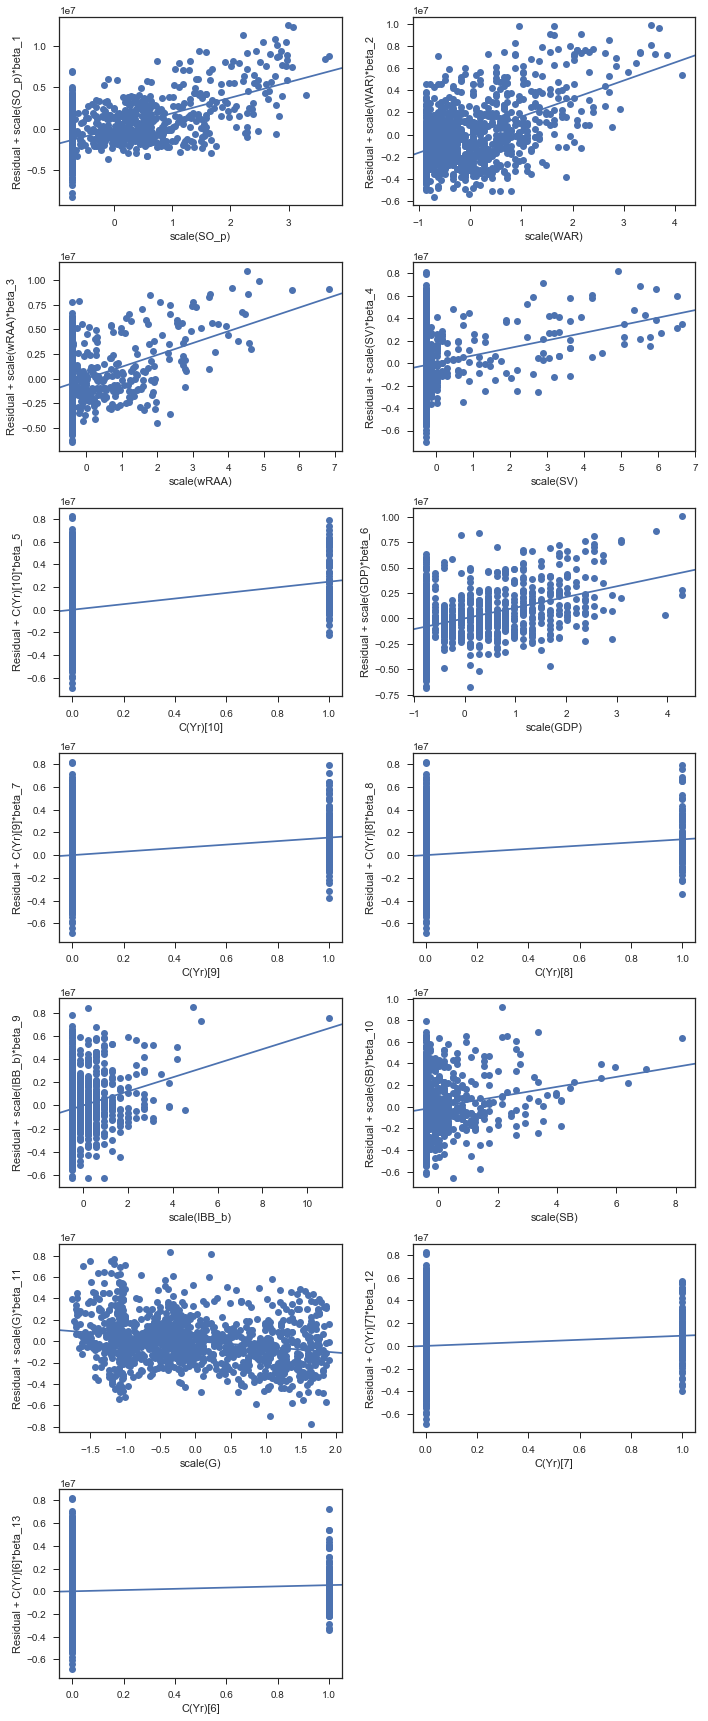

In [84]:
fig = plt.figure(figsize=(10, 25))
sm.graphics.plot_ccpr_grid(result_idx_elim2_b_4, fig=fig)
fig.suptitle("")
plt.show()

## * Trying to another OLS Modeling

## 1. Numeric Variables ONLY

In [85]:
converted_num_ols = " + ".join(num_cols_list)

num_ols_model = model_str + converted_num_ols
num_ols_model

'Salary ~ scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP)'

### * 3rd OLS analysis

In [86]:
model3 = sm.OLS.from_formula(num_ols_model, df)
result3 = model3.fit()
print(result3.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     35.19
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          1.04e-229
Time:                        12:12:50   Log-Likelihood:                -19963.
No. Observations:                1225   AIC:                         4.006e+04
Df Residuals:                    1158   BIC:                         4.040e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.817e+06    

In [87]:
dfX_num1 = df_x.iloc[:, 2:68]
dfX_num1.tail()

,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP
1220,84,319.0,344.0,83.0,57.0,13.0,1.0,12.0,35.0,47.0,19.0,0.0,60.0,5.5,17.4,0.32,0.284,2.0,3.0,1.0,11.0,1.0,0.0,0.0,0.160,0.311,0.0,0.260,0.303,0.420,0.723,0.0,91.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1221,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.1,0.0,0.00,0.0,1.0,1.0,0.0,5.1,9.0,0.0,1.0,5.0,8.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,27.0,1.0,0.0,1.69,8.44,5.0,14.8,47.4,0.0,33.3,11.81,0.474,2.96,1.88
1222,113,416.0,457.0,110.0,72.0,24.0,0.0,14.0,41.0,68.0,33.0,3.0,121.0,7.2,26.5,0.27,0.337,4.0,4.0,0.0,5.0,2.0,0.0,9.8,0.159,0.319,0.4,0.264,0.322,0.423,0.745,1.6,91.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1223,131,482.0,523.0,148.0,101.0,25.0,0.0,22.0,58.0,80.0,35.0,2.0,79.0,6.7,15.1,0.44,0.327,2.0,4.0,0.0,17.0,0.0,0.0,8.4,0.189,0.361,18.7,0.307,0.354,0.496,0.850,3.4,124.0,2.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1224,132,479.0,543.0,134.0,77.0,25.0,1.0,31.0,72.0,86.0,51.0,8.0,108.0,9.4,19.9,0.47,0.298,7.0,6.0,0.0,14.0,3.0,1.0,0.0,0.251,0.369,22.8,0.280,0.354,0.530,0.884,3.2,135.0,3.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00


In [88]:
model3_1 = sm.OLS(dfY, dfX_num1)
result3_1 = model3_1.fit()
print(result3_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     83.05
Date:                Wed, 24 Jan 2018   Prob (F-statistic):               0.00
Time:                        12:12:50   Log-Likelihood:                -19968.
No. Observations:                1225   AIC:                         4.007e+04
Df Residuals:                    1159   BIC:                         4.041e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
G            -4.047e+04   8325.723     -4.861   

In [89]:
dfX_num2 = df_x_copy.iloc[:, 2:68]
dfX_num2.tail()

,scale(G),scale(AB),scale(PA),scale(H_b),scale(Hits),scale(Doubles),scale(Triples),scale(HR_b),scale(R_b),scale(RBI),scale(BB_b),scale(IBB_b),scale(SO_b),scale(BB_Percent),scale(K_Percent),scale(BB_per_K),scale(BABIP_b),scale(HBP_b),scale(SF),scale(SH),scale(GDP),scale(SB),scale(CS),scale(Def),scale(ISO),scale(wOBA),scale(wRAA),scale(AVG),scale(OBP),scale(SLG),scale(OPS),scale(WAR),scale(wRC_Plus),scale(WPA),scale(W),scale(L),scale(GS),scale(CG),scale(IP),scale(H_p),scale(HR_p),scale(BB_p),scale(SO_p),scale(R_p),scale(SV),scale(BS),scale(BK),scale(ER),scale(HBP_p),scale(HLD),scale(IBB_p),scale(ShO),scale(TBF),scale(WP),scale(HR_per_9),scale(BB_per_9),scale(K_per_9),scale(K_per_BB),scale(K_BB_Percent),scale(GB_Percent),scale(HR_per_FB),scale(LOB_Percent),scale(ERA),scale(BABIP_p),scale(FIP),scale(WHIP)
1220,84,319.0,344.0,83.0,57.0,13.0,1.0,12.0,35.0,47.0,19.0,0.0,60.0,5.5,17.4,0.32,0.284,2.0,3.0,1.0,11.0,1.0,0.0,0.0,0.160,0.311,0.0,0.260,0.303,0.420,0.723,0.0,91.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1221,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.1,0.0,0.00,0.0,1.0,1.0,0.0,5.1,9.0,0.0,1.0,5.0,8.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,27.0,1.0,0.0,1.69,8.44,5.0,14.8,47.4,0.0,33.3,11.81,0.474,2.96,1.88
1222,113,416.0,457.0,110.0,72.0,24.0,0.0,14.0,41.0,68.0,33.0,3.0,121.0,7.2,26.5,0.27,0.337,4.0,4.0,0.0,5.0,2.0,0.0,9.8,0.159,0.319,0.4,0.264,0.322,0.423,0.745,1.6,91.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1223,131,482.0,523.0,148.0,101.0,25.0,0.0,22.0,58.0,80.0,35.0,2.0,79.0,6.7,15.1,0.44,0.327,2.0,4.0,0.0,17.0,0.0,0.0,8.4,0.189,0.361,18.7,0.307,0.354,0.496,0.850,3.4,124.0,2.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1224,132,479.0,543.0,134.0,77.0,25.0,1.0,31.0,72.0,86.0,51.0,8.0,108.0,9.4,19.9,0.47,0.298,7.0,6.0,0.0,14.0,3.0,1.0,0.0,0.251,0.369,22.8,0.280,0.354,0.530,0.884,3.2,135.0,3.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00


In [90]:
model3_2 = sm.OLS(dfY, dfX_num2)
result3_2 = model3_2.fit()
print(result3_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     83.05
Date:                Wed, 24 Jan 2018   Prob (F-statistic):               0.00
Time:                        12:12:51   Log-Likelihood:                -19968.
No. Observations:                1225   AIC:                         4.007e+04
Df Residuals:                    1159   BIC:                         4.041e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
scale(G)            -4.047e+04   8

## * Eliminating Outliers of 3-1 OLS analysis RESULT

In [91]:
def elim_outliers(result, dfX):
    influence = result.get_influence()
    cooks_d2, pvals = influence.cooks_distance
    fox_cr = 4 / (len(dfY) - len(dfX.columns) - 1)
    idx = np.where(cooks_d2 > fox_cr)[0]
    
    return idx

In [95]:
idx3_1 = elim_outliers(result3_1, dfX_num1)
print(idx3_1, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx3_1)))

[   6    7    8   11   13   19   24   28   36   44   49   54   65   66  105
  113  115  119  144  158  187  197  200  202  244  248  252  270  272  291
  314  331  333  391  393  394  401  405  411  416  438  446  447  460  465
  499  507  539  540  549  558  571  605  683  691  696  737  743  747  753
  757  766  782  791  794  797  801  814  826  837  914  918  958  993 1000
 1020 1027 1049 1059 1073 1077 1088 1091 1096 1106 1108 1115 1135 1156 1188
 1196 1221 1224] 

There are '93' Outliers according to Fox criteria


In [96]:
idx3_2 = elim_outliers(result3_2, dfX_num2)
print(idx3_2, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx3_2)))

[   6    7    8   11   13   19   24   28   36   44   49   54   65   66  105
  113  115  119  144  158  187  197  200  202  244  248  252  270  272  291
  314  331  333  391  393  394  401  405  411  416  438  446  447  460  465
  499  507  539  540  549  558  571  605  683  691  696  737  743  747  753
  757  766  782  791  794  797  801  814  826  837  914  918  958  993 1000
 1020 1027 1049 1059 1073 1077 1088 1091 1096 1106 1108 1115 1135 1156 1188
 1196 1221 1224] 

There are '93' Outliers according to Fox criteria


In [97]:
dfX3_idx = dfX_num1.drop(idx3_1)
dfY_idx3 = dfY.drop(idx3_1)

In [98]:
dfX3_idx2 = dfX_num2.drop(idx3_2)
dfY_idx3 = dfY.drop(idx3_2)

### * 3-1 OLS analysis

In [99]:
dfX3_idx_elim = sm.add_constant(dfX3_idx2)
model3_idx_elim = sm.OLS(dfY_idx3, dfX3_idx_elim)
result3_idx_elim = model3_idx_elim.fit()
print(result3_idx_elim.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     43.58
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          1.28e-253
Time:                        12:13:20   Log-Likelihood:                -18110.
No. Observations:                1132   AIC:                         3.635e+04
Df Residuals:                    1066   BIC:                         3.668e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.871e+06   9

## * Filtrating P-VALUE under 5% above model

In [100]:
dfX_num_elim_pvals = extracted_pvals(result3_idx_elim, 0.05)

extracted_features5_num_elim = list(dfX_num_elim_pvals.index.values)
extracted_df_num_elim_x = dfX3_idx_elim.loc[:, extracted_features5_num_elim]

### * 3-2 OLS analysis

In [101]:
dfX_num_elim = sm.add_constant(extracted_df_num_elim_x)

model_df_num_elim = sm.OLS(dfY_idx3, dfX_num_elim)
result_df_num_elim = model_df_num_elim.fit()
print(result_df_num_elim.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     117.4
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          4.91e-257
Time:                        12:13:22   Log-Likelihood:                -18201.
No. Observations:                1132   AIC:                         3.644e+04
Df Residuals:                    1111   BIC:                         3.655e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.74e+06   5.14e+0

## * Filtrating P-VALUE under 5% above model 2

In [102]:
dfX_num_elim_pvals2 = extracted_pvals(result_df_num_elim, 0.05)

extracted_features5_num_elim2 = list(dfX_num_elim_pvals2.index.values)
extracted_df_num_elim_x2 = dfX_num_elim.loc[:, extracted_features5_num_elim2]

### * 3-3 OLS analysis

In [104]:
dfX_num_elim3 = sm.add_constant(extracted_df_num_elim_x2)

model_df_num_elim3 = sm.OLS(dfY_idx3, dfX_num_elim3)
result_df_num_elim3 = model_df_num_elim3.fit()
print(result_df_num_elim3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     146.9
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          6.10e-261
Time:                        12:13:33   Log-Likelihood:                -18202.
No. Observations:                1132   AIC:                         3.644e+04
Df Residuals:                    1115   BIC:                         3.652e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
scale(SO_p)   5.766e+04   5266.359     10.948   

## * Variance Inflation Factor(VIF) for eliminating Multi-Collinearity

In [105]:
df_vif3 = var_inf_fac(dfX_num_elim3)

In [106]:
df_vif3['VIF Factor'].sort_values(ascending=False)

16    973222.487441
14    305135.548684
15    192717.572408
12       322.840232
6        293.918457
10        15.511851
7         11.683139
0         11.251535
13         9.673851
11         7.090975
8          6.997563
5          3.430746
2          3.234200
1          3.149077
9          2.436441
4          1.968173
3          1.452199
Name: VIF Factor, dtype: float64

In [107]:
df_vif3_del_list = list(df_vif3.loc[df_vif3['VIF Factor'] > 10, 'feature'])

In [108]:
df_vif3_del_list

['scale(SO_p)',
 'scale(ER)',
 'scale(R_b)',
 'const',
 'scale(R_p)',
 'scale(SLG)',
 'scale(OBP)',
 'scale(OPS)']

In [109]:
dfX_num_elim3.drop(df_vif3_del_list, axis=1, inplace=True)

In [110]:
print(len(dfX_num_elim3.columns.tolist()))
dfX_num_elim3.tail()

9


,scale(WAR),scale(wRAA),scale(SV),scale(IBB_p),scale(GDP),scale(G),scale(WPA),scale(W),scale(L)
1218,0.1,0.0,0.0,2.0,0.0,77,1.28,4.0,0.0
1219,0.0,0.0,0.0,3.0,0.0,50,0.00,4.0,4.0
1220,0.0,0.0,0.0,0.0,11.0,84,0.50,0.0,0.0
1222,1.6,0.4,0.0,0.0,5.0,113,0.64,0.0,0.0
1223,3.4,18.7,0.0,0.0,17.0,131,2.58,0.0,0.0


### * 3-4 OLS analysis

In [111]:
dfX3_idx_elim = sm.add_constant(dfX_num_elim3)

model13_idx_elim = sm.OLS(dfY_idx3, dfX3_idx_elim)
result3_idx_elim3 = model13_idx_elim.fit()
print(result3_idx_elim3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     197.7
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          2.09e-224
Time:                        12:13:39   Log-Likelihood:                -18306.
No. Observations:                1132   AIC:                         3.663e+04
Df Residuals:                    1122   BIC:                         3.668e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.278e+06   2.44e+05      5.227   

## 2. Categorical Variable(Yr) + Numeric Variables + ZERO

In [112]:
yr_str = 'C(Yr) + '

cat_num_ols_list = model_str + yr_str + converted_num_ols + zero
cat_num_ols_list

'Salary ~ C(Yr) + scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP) + 0'

### * 4th OLS analysis

In [113]:
model4 = sm.OLS.from_formula(cat_num_ols_list, df)
result4 = model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     32.76
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          7.43e-235
Time:                        12:13:42   Log-Likelihood:                -19931.
No. Observations:                1225   AIC:                         4.002e+04
Df Residuals:                    1148   BIC:                         4.041e+04
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(Yr)[0]             4.356e+06   3

In [114]:
dfX4_num1 = df_x_copy.iloc[:, 0:1]
dfX4_num2 = df_x_copy.iloc[:, 2:68]
dfX4_num = pd.concat([dfX4_num1, dfX4_num2], axis=1)
dfX4_num.tail()

,C(Yr),scale(G),scale(AB),scale(PA),scale(H_b),scale(Hits),scale(Doubles),scale(Triples),scale(HR_b),scale(R_b),scale(RBI),scale(BB_b),scale(IBB_b),scale(SO_b),scale(BB_Percent),scale(K_Percent),scale(BB_per_K),scale(BABIP_b),scale(HBP_b),scale(SF),scale(SH),scale(GDP),scale(SB),scale(CS),scale(Def),scale(ISO),scale(wOBA),scale(wRAA),scale(AVG),scale(OBP),scale(SLG),scale(OPS),scale(WAR),scale(wRC_Plus),scale(WPA),scale(W),scale(L),scale(GS),scale(CG),scale(IP),scale(H_p),scale(HR_p),scale(BB_p),scale(SO_p),scale(R_p),scale(SV),scale(BS),scale(BK),scale(ER),scale(HBP_p),scale(HLD),scale(IBB_p),scale(ShO),scale(TBF),scale(WP),scale(HR_per_9),scale(BB_per_9),scale(K_per_9),scale(K_per_BB),scale(K_BB_Percent),scale(GB_Percent),scale(HR_per_FB),scale(LOB_Percent),scale(ERA),scale(BABIP_p),scale(FIP),scale(WHIP)
1220,10,84,319.0,344.0,83.0,57.0,13.0,1.0,12.0,35.0,47.0,19.0,0.0,60.0,5.5,17.4,0.32,0.284,2.0,3.0,1.0,11.0,1.0,0.0,0.0,0.160,0.311,0.0,0.260,0.303,0.420,0.723,0.0,91.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1221,10,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.1,0.0,0.00,0.0,1.0,1.0,0.0,5.1,9.0,0.0,1.0,5.0,8.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,27.0,1.0,0.0,1.69,8.44,5.0,14.8,47.4,0.0,33.3,11.81,0.474,2.96,1.88
1222,10,113,416.0,457.0,110.0,72.0,24.0,0.0,14.0,41.0,68.0,33.0,3.0,121.0,7.2,26.5,0.27,0.337,4.0,4.0,0.0,5.0,2.0,0.0,9.8,0.159,0.319,0.4,0.264,0.322,0.423,0.745,1.6,91.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1223,10,131,482.0,523.0,148.0,101.0,25.0,0.0,22.0,58.0,80.0,35.0,2.0,79.0,6.7,15.1,0.44,0.327,2.0,4.0,0.0,17.0,0.0,0.0,8.4,0.189,0.361,18.7,0.307,0.354,0.496,0.850,3.4,124.0,2.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1224,10,132,479.0,543.0,134.0,77.0,25.0,1.0,31.0,72.0,86.0,51.0,8.0,108.0,9.4,19.9,0.47,0.298,7.0,6.0,0.0,14.0,3.0,1.0,0.0,0.251,0.369,22.8,0.280,0.354,0.530,0.884,3.2,135.0,3.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00


In [115]:
dfX4_1 = sm.add_constant(dfX4_num)
model4_1 = sm.OLS(dfY, dfX4_1)
result4_1 = model4_1.fit()
print(result4_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     36.26
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          1.87e-236
Time:                        12:13:42   Log-Likelihood:                -19944.
No. Observations:                1225   AIC:                         4.002e+04
Df Residuals:                    1157   BIC:                         4.037e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.012e+06   1

## * Eliminating Outliers of 4-1 Model

In [116]:
converted_yr_num_list = yr_str + converted_num_ols +zero
converted_yr_num_list

'C(Yr) + scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP) + 0'

In [117]:
dfX4_elim = dmatrix(converted_yr_num_list, df)
dfX4_columns_elim = dfX4_elim.design_info.column_names
dfX4_elim = pd.DataFrame(dfX4_elim, columns=dfX4_columns_elim)

In [118]:
def elim_outliers(result, dfX):
    influence = result.get_influence()
    cooks_d2, pvals = influence.cooks_distance
    fox_cr = 4 / (len(dfY) - len(dfX.columns) - 1)
    idx = np.where(cooks_d2 > fox_cr)[0]
    
    return idx

In [119]:
idx_yr_num = elim_outliers(result4, dfX4_num)
print(idx_yr_num, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx_yr_num)))

[   7    8   11   13   19   28   36   41   43   44   65   66  105  113  115
  118  119  132  137  144  155  158  187  200  202  220  244  248  252  259
  270  272  291  333  393  397  405  411  438  460  499  507  539  549  558
  571  605  631  683  737  743  747  753  766  791  800  801  802  814  826
  837  914  958  993 1000 1020 1036 1041 1049 1073 1077 1088 1091 1096 1106
 1115 1135 1156 1174 1180 1188 1196 1209 1221 1224] 

There are '85' Outliers according to Fox criteria


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:309: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In [120]:
dfX4_yr_num_idx = dfX4_elim.drop(idx_yr_num)
dfY4_yr_num_idx = dfY.drop(idx_yr_num)

### * 4-2 OLS analysis

In [121]:
dfX4_yr_num_idx_elim = sm.add_constant(dfX4_yr_num_idx)
model4_yr_num_idx_elim = sm.OLS(dfY4_yr_num_idx, dfX4_yr_num_idx_elim)
result4_yr_num_idx_elim = model4_yr_num_idx_elim.fit()
print(result4_yr_num_idx_elim.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     38.58
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          5.16e-253
Time:                        12:13:46   Log-Likelihood:                -18208.
No. Observations:                1140   AIC:                         3.657e+04
Df Residuals:                    1063   BIC:                         3.696e+04
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.282e+06   6

## * Filtrating P-VALUE under 5% above model

In [122]:
idx_yr_num2 = extracted_pvals(result4_yr_num_idx_elim, 0.05)

extracted_feature_yr_num_elim = idx_yr_num2.index.values
extracted_yr_num_elim_x = dfX4_yr_num_idx_elim.loc[:, extracted_feature_yr_num_elim]

### * 4-3 OLS analysis

In [123]:
dfX4_yr_num_idx_elim2 = sm.add_constant(extracted_yr_num_elim_x)
model4_yr_num_idx_elim2 = sm.OLS(dfY4_yr_num_idx, dfX4_yr_num_idx_elim2)
result4_yr_num_idx_elim2 = model4_yr_num_idx_elim2.fit()
print(result4_yr_num_idx_elim2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     80.46
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          2.71e-244
Time:                        12:13:48   Log-Likelihood:                -18332.
No. Observations:                1140   AIC:                         3.672e+04
Df Residuals:                    1111   BIC:                         3.687e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.453e+06   1.08e+0

## * Filtrating P-VALUE under 5% above model

In [124]:
idx_yr_num3 = extracted_pvals(result4_yr_num_idx_elim2, 0.05)

extracted_feature_yr_num_elim2 = idx_yr_num3.index.values
extracted_yr_num_elim_x2 = dfX4_yr_num_idx_elim2.loc[:, extracted_feature_yr_num_elim2]

### * 4-4 OLS analysis

In [125]:
dfX4_yr_num_idx_elim3 = sm.add_constant(extracted_yr_num_elim_x2)
model4_yr_num_idx_elim3 = sm.OLS(dfY4_yr_num_idx, dfX4_yr_num_idx_elim3)
result4_yr_num_idx_elim3 = model4_yr_num_idx_elim3.fit()
print(result4_yr_num_idx_elim3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     112.6
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          4.74e-251
Time:                        12:13:50   Log-Likelihood:                -18334.
No. Observations:                1140   AIC:                         3.671e+04
Df Residuals:                    1119   BIC:                         3.682e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.434e+06   9.41e+04  

## * Variance Inflation Factor(VIF) for eliminating Multi-Collinearity

In [126]:
df_vif4_4 = var_inf_fac(dfX4_yr_num_idx_elim3)

In [127]:
df_vif4_4['VIF Factor'].sort_values(ascending=False)

17    306.210605
10    294.222494
16     61.440133
15     53.229459
9       9.409986
19      9.117332
1       8.660585
13      7.240872
20      4.794183
4       3.633809
5       3.151376
2       3.020140
11      2.058422
0       1.818011
6       1.714060
8       1.636755
3       1.303356
14      1.115603
12      1.113634
18      1.095555
7       1.088187
Name: VIF Factor, dtype: float64

In [128]:
df_vif4_4_del_list = list(df_vif4_4.loc[df_vif4_4['VIF Factor'] > 10, 'feature'])

In [129]:
df_vif4_4_del_list

['scale(ER)', 'scale(wRC_Plus)', 'scale(SLG)', 'scale(R_p)']

In [130]:
dfX4_yr_num_idx_elim3.drop(df_vif4_4_del_list, axis=1, inplace=True)

In [131]:
print(len(dfX4_yr_num_idx_elim3.columns.tolist()))
dfX4_yr_num_idx_elim3.tail()

17


,const,scale(SO_p),scale(WAR),scale(SV),scale(GDP),scale(wRAA),scale(IBB_b),C(Yr)[10],scale(SB),scale(SO_b),scale(IBB_p),C(Yr)[3],scale(G),C(Yr)[8],C(Yr)[9],scale(K_Percent),scale(BB_per_9)
1218,1.0,0.275882,-0.658062,-0.271484,-0.769897,-0.084996,-0.476154,1.0,-0.421406,-0.850207,0.457948,0.0,-0.028248,0.0,0.0,-0.949117,1.105814
1219,1.0,0.676453,-0.728190,-0.271484,-0.769897,-0.084996,-0.476154,1.0,-0.421406,-0.850207,0.999440,0.0,-0.641700,0.0,0.0,-0.949117,1.802195
1220,1.0,-0.715004,-1.008703,-0.271484,1.153062,-0.318475,-0.476154,1.0,-0.269710,0.497058,-0.625037,0.0,0.130796,0.0,0.0,0.680057,-0.850686
1222,1.0,-0.715004,0.393864,-0.271484,0.104175,-0.040524,0.596068,1.0,-0.118014,1.866777,-0.625037,0.0,0.789689,0.0,0.0,1.532096,-0.850686
1223,1.0,-0.715004,1.656174,-0.271484,2.201948,1.994078,0.238661,1.0,-0.421406,0.923692,-0.625037,0.0,1.198658,0.0,0.0,0.464706,-0.850686


### * 4-5 OLS analysis

In [132]:
dfX_idx_elim4_5 = sm.add_constant(dfX4_yr_num_idx_elim3)

model_idx_elim4_5 = sm.OLS(dfY4_yr_num_idx, dfX_idx_elim4_5)
result_idx_elim4_5 = model_idx_elim4_5.fit()
print(result_idx_elim4_5.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     126.2
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          2.13e-237
Time:                        12:13:54   Log-Likelihood:                -18377.
No. Observations:                1140   AIC:                         3.679e+04
Df Residuals:                    1123   BIC:                         3.687e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.371e+06    9.7e+04  

## * Filtrating P-VALUE under 5% above model

In [133]:
dfX_idx_elim4_6 = extracted_pvals(result_idx_elim4_5, 0.05)

extracted_feature_idx_elim4_6 = dfX_idx_elim4_6.index.values
dfX_idx_elim4_6 = dfX_idx_elim4_5.loc[:, extracted_feature_idx_elim4_6]

### * 4-6 OLS analysis

In [135]:
dfX4_yr_num_idx_elim4 = sm.add_constant(dfX_idx_elim4_6)
model4_yr_num_idx_elim4 = sm.OLS(dfY4_yr_num_idx, dfX4_yr_num_idx_elim4)
result4_yr_num_idx_elim4 = model4_yr_num_idx_elim4.fit()
print(result4_yr_num_idx_elim4.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     134.0
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          1.09e-237
Time:                        12:14:12   Log-Likelihood:                -18378.
No. Observations:                1140   AIC:                         3.679e+04
Df Residuals:                    1124   BIC:                         3.687e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.377e+06   9.71e+04  